In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [54]:
data=pd.read_csv(r"E:\AI ML DATA SET\starbucks\starbucks.csv")

In [55]:
data.shape

(242, 18)

In [56]:
data.head()

Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   

   Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0            0.1             0.0                0.0             0   
1            0.1             0.0                0.0             0   
2            0.1             0.0                0.0             0   
3            0.1             0.0                0.0             0   
4            0.1             0.1                0.0             5   

    Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                          5                 0                   0   
1                         10                 0                   0   
2                         10                 0                   0   
3                         10                 0                   0   
4                         75                10                   0   

    Sugars (g)   Protein (g)  Vitamin A (% DV)  Vitamin C (% DV)  \
0            0            0.3                0%               0%   
1            0            0.5                0%               0%   
2            0            1.0                0%               0%   
3            0            1.0                0%               0%   
4            9            6.0               10%               0%   

   Calcium (% DV)  Iron (% DV)  Caffeine (mg)  
0               0%           0%           175  
1               0%           0%           260  
2               0%           0%           330  
3               2%           0%           410  
4              20%           0%            75

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [58]:
data.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

In [59]:
data.duplicated().sum()

0

In [60]:
data.describe()

Calories  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
count  242.000000      242.000000         242.000000    242.000000   
mean   193.871901        1.307025           0.037603      6.363636   
std    102.863303        1.640259           0.071377      8.630257   
min      0.000000        0.000000           0.000000      0.000000   
25%    120.000000        0.100000           0.000000      0.000000   
50%    185.000000        0.500000           0.000000      5.000000   
75%    260.000000        2.000000           0.100000     10.000000   
max    510.000000        9.000000           0.300000     40.000000   

        Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
count                 242.000000        242.000000          242.000000   
mean                  128.884298         35.991736            0.805785   
std                    82.303223         20.795186            1.445944   
min                     0.000000          0.000000            0.000000   
25%                    70.000000         21.000000            0.000000   
50%                   125.000000         34.000000            0.000000   
75%                   170.000000         50.750000            1.000000   
max                   340.000000         90.000000            8.000000   

        Sugars (g)   Protein (g)   
count   242.000000     242.000000  
mean     32.962810       6.978512  
std      19.730199       4.871659  
min       0.000000       0.000000  
25%      18.000000       3.000000  
50%      32.000000       6.000000  
75%      43.750000      10.000000  
max      84.000000      20.000000

In [61]:
data.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_17404\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


Calories  Trans Fat (g)   Saturated Fat (g)  \
Calories                   1.000000        0.642818           0.331047   
Trans Fat (g)              0.642818        1.000000           0.694871   
Saturated Fat (g)          0.331047        0.694871           1.000000   
 Sodium (mg)               0.387892        0.707794           0.920077   
 Total Carbohydrates (g)   0.795037        0.524176           0.238142   
Cholesterol (mg)           0.940034        0.439811           0.161791   
 Dietary Fibre (g)         0.384292        0.131267          -0.093783   
 Sugars (g)                0.909675        0.419887           0.179255   
 Protein (g)               0.578453        0.496317           0.287532   

                            Sodium (mg)   Total Carbohydrates (g)   \
Calories                       0.387892                   0.795037   
Trans Fat (g)                  0.707794                   0.524176   
Saturated Fat (g)              0.920077                   0.238142   
 Sodium (mg)                   1.000000                   0.290295   
 Total Carbohydrates (g)       0.290295                   1.000000   
Cholesterol (mg)               0.199477                   0.766654   
 Dietary Fibre (g)            -0.060154                   0.173378   
 Sugars (g)                    0.205969                   0.771407   
 Protein (g)                   0.496233                   0.410629   

                           Cholesterol (mg)   Dietary Fibre (g)   Sugars (g)  \
Calories                           0.940034            0.384292     0.909675   
Trans Fat (g)                      0.439811            0.131267     0.419887   
Saturated Fat (g)                  0.161791           -0.093783     0.179255   
 Sodium (mg)                       0.199477           -0.060154     0.205969   
 Total Carbohydrates (g)           0.766654            0.173378     0.771407   
Cholesterol (mg)                   1.000000            0.342040     0.984196   
 Dietary Fibre (g)                 0.342040            1.000000     0.184171   
 Sugars (g)                        0.984196            0.184171     1.000000   
 Protein (g)                       0.360449            0.540274     0.263061   

                            Protein (g)   
Calories                        0.578453  
Trans Fat (g)                   0.496317  
Saturated Fat (g)               0.287532  
 Sodium (mg)                    0.496233  
 Total Carbohydrates (g)        0.410629  
Cholesterol (mg)                0.360449  
 Dietary Fibre (g)              0.540274  
 Sugars (g)                     0.263061  
 Protein (g)                    1.000000

In [62]:
data.sample()

Beverage_category                   Beverage Beverage_prep  Calories  \
131  Tazo® Tea Drinks  Tazo® Full-Leaf Tea Latte       2% Milk        90   

     Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
131              2             1.0                0.1            10   

      Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
131                         50                15                   0   

      Sugars (g)   Protein (g)  Vitamin A (% DV)  Vitamin C (% DV)  \
131           15            3.0                6%               0%   

     Calcium (% DV)  Iron (% DV)  Caffeine (mg)  
131              10%        0.00%        varies

# Handling missing value 

In [63]:
rows=data.isnull().values.any(axis=1)
data[rows]

Beverage_category                                        Beverage  \
158  Shaken Iced Beverages  Iced Brewed Coffee (With Milk & Classic Syrup)   

    Beverage_prep  Calories  Total Fat (g)  Trans Fat (g)   Saturated Fat (g)  \
158       2% Milk        90              1             0.5                0.0   

      Sodium (mg)   Total Carbohydrates (g)   Cholesterol (mg)  \
158             5                         25                18   

      Dietary Fibre (g)   Sugars (g)   Protein (g)  Vitamin A (% DV)   \
158                   0           18            2.0                2%   

    Vitamin C (% DV)  Calcium (% DV)  Iron (% DV)  Caffeine (mg)  
158               0%               6%        0.00%           NaN

In [64]:
handling_missing=data[data['Beverage_category']=='Shaken Iced Beverages']
handling_missing

Beverage_category                                           Beverage  \
154  Shaken Iced Beverages            Iced Brewed Coffee (With Classic Syrup)   
155  Shaken Iced Beverages            Iced Brewed Coffee (With Classic Syrup)   
156  Shaken Iced Beverages            Iced Brewed Coffee (With Classic Syrup)   
157  Shaken Iced Beverages     Iced Brewed Coffee (With Milk & Classic Syrup)   
158  Shaken Iced Beverages     Iced Brewed Coffee (With Milk & Classic Syrup)   
159  Shaken Iced Beverages     Iced Brewed Coffee (With Milk & Classic Syrup)   
160  Shaken Iced Beverages     Iced Brewed Coffee (With Milk & Classic Syrup)   
161  Shaken Iced Beverages     Iced Brewed Coffee (With Milk & Classic Syrup)   
162  Shaken Iced Beverages     Iced Brewed Coffee (With Milk & Classic Syrup)   
163  Shaken Iced Beverages     Iced Brewed Coffee (With Milk & Classic Syrup)   
164  Shaken Iced Beverages     Iced Brewed Coffee (With Milk & Classic Syrup)   
165  Shaken Iced Beverages     Iced Brewed Coffee (With Milk & Classic Syrup)   
166  Shaken Iced Beverages         Shaken Iced Tazo® Tea (With Classic Syrup)   
167  Shaken Iced Beverages         Shaken Iced Tazo® Tea (With Classic Syrup)   
168  Shaken Iced Beverages         Shaken Iced Tazo® Tea (With Classic Syrup)   
169  Shaken Iced Beverages  Shaken Iced Tazo® Tea Lemonade (With Classic S...   
170  Shaken Iced Beverages  Shaken Iced Tazo® Tea Lemonade (With Classic S...   
171  Shaken Iced Beverages  Shaken Iced Tazo® Tea Lemonade (With Classic S...   

          Beverage_prep  Calories  Total Fat (g)  Trans Fat (g)   \
154                Tall        60              0             0.0   
155              Grande        90            0.1             0.0   
156               Venti       130            0.1             0.0   
157    Tall Nonfat Milk        80            0.1             0.0   
158             2% Milk        90              1             0.5   
159             Soymilk        80              1             0.1   
160  Grande Nonfat Milk       110            0.1             0.0   
161             2% Milk       120            1.5             0.5   
162             Soymilk       110              1             0.1   
163   Venti Nonfat Milk       160            0.1             0.1   
164             2% Milk       180              2             1.0   
165             Soymilk       170            1.5             0.2   
166                Tall        60              0             0.0   
167              Grande        80              0             0.0   
168               Venti       120              0             0.0   
169                Tall       100              0             0.0   
170              Grande       130              0             0.0   
171               Venti       190              0             0.0   

     Saturated Fat (g)   Sodium (mg)   Total Carbohydrates (g)   \
154                0.0             0                          4   
155                0.0             0                          5   
156                0.0             0                          5   
157                0.0             0                         25   
158                0.0             5                         25   
159                0.0             0                         20   
160                0.0             0                         30   
161                0.0             5                         35   
162                0.0             0                         30   
163                0.0             0                         50   
164                0.1            10                         55   
165                0.0             0                         45   
166                0.0             0                          0   
167                0.0             0                          0   
168                0.0             0                          0   
169                0.0             0                          0   
170                0.0             0 

In [65]:
r1=data['Beverage_category']=='Shaken Iced Beverages'
r2=data['Beverage']=='Iced Brewed Coffee (With Milk & Classic Syrup)'
r3=data['Beverage_prep']=='2% Milk'
data[r2 & r3 & r1]

Beverage_category                                        Beverage  \
158  Shaken Iced Beverages  Iced Brewed Coffee (With Milk & Classic Syrup)   
161  Shaken Iced Beverages  Iced Brewed Coffee (With Milk & Classic Syrup)   
164  Shaken Iced Beverages  Iced Brewed Coffee (With Milk & Classic Syrup)   

    Beverage_prep  Calories  Total Fat (g)  Trans Fat (g)   Saturated Fat (g)  \
158       2% Milk        90              1             0.5                0.0   
161       2% Milk       120            1.5             0.5                0.0   
164       2% Milk       180              2             1.0                0.1   

      Sodium (mg)   Total Carbohydrates (g)   Cholesterol (mg)  \
158             5                         25                18   
161             5                         35                24   
164            10                         55                36   

      Dietary Fibre (g)   Sugars (g)   Protein (g)  Vitamin A (% DV)   \
158                   0           18            2.0                2%   
161                   0           24            2.0                4%   
164                   0           36            4.0                6%   

    Vitamin C (% DV)  Calcium (% DV)  Iron (% DV)  Caffeine (mg)  
158               0%               6%        0.00%           NaN  
161               0%               8%           0%           125  
164               0%              10%           0%           170

In [66]:
array_mean=[125,170]
mean=np.mean(array_mean)

data['Caffeine (mg)'].fillna(mean,inplace=True)

In [67]:
cols=data.columns
cols

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [68]:
for columns in cols:
    print()
    print(columns)
    print(data[columns].dtypes)
    print(data[columns].value_counts())


Beverage_category
object
Classic Espresso Drinks              58
Tazo® Tea Drinks                     52
Signature Espresso Drinks            40
Frappuccino® Blended Coffee          36
Shaken Iced Beverages                18
Frappuccino® Blended Crème           13
Frappuccino® Light Blended Coffee    12
Smoothies                             9
Coffee                                4
Name: Beverage_category, dtype: int64

Beverage
object
Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)        12
White Chocolate Mocha (Without Whipped Cream)          12
Tazo® Full-Leaf Tea Latte                              12
Tazo® Green Tea Latte                                  12
Tazo® Chai Tea Latte                                   12
Coffee                                                 12
Hot Chocolate (Without Whipped Cream)                  12
Caramel Macchiato                                      12
Cappuccino                                             12
Vanilla Latte (Or Other Flavoured Lat

# Handling Varies varies in caffeine column

In [69]:
r1=data['Caffeine (mg)']=='varies'
r2=data['Caffeine (mg)']=='Varies'
data[r1 | r2]

Beverage_category                                           Beverage  \
102       Tazo® Tea Drinks                                          Tazo® Tea   
103       Tazo® Tea Drinks                                          Tazo® Tea   
104       Tazo® Tea Drinks                                          Tazo® Tea   
105       Tazo® Tea Drinks                                          Tazo® Tea   
130       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
131       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
132       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
133       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
134       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
135       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
136       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
137       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
138       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
139       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
140       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
141       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
167  Shaken Iced Beverages         Shaken Iced Tazo® Tea (With Classic Syrup)   
168  Shaken Iced Beverages         Shaken Iced Tazo® Tea (With Classic Syrup)   
169  Shaken Iced Beverages  Shaken Iced Tazo® Tea Lemonade (With Classic S...   
170  Shaken Iced Beverages  Shaken Iced Tazo® Tea Lemonade (With Classic S...   
171  Shaken Iced Beverages  Shaken Iced Tazo® Tea Lemonade (With Classic S...   
172              Smoothies                          Banana Chocolate Smoothie   

          Beverage_prep  Calories  Total Fat (g)  Trans Fat (g)   \
102               Short         0              0             0.0   
103                Tall         0              0             0.0   
104              Grande         0              0             0.0   
105               Venti         0              0             0.0   
130   Short Nonfat Milk        80            0.1             0.1   
131             2% Milk        90              2             1.0   
132             Soymilk        80            1.5             0.2   
133    Tall Nonfat Milk       120            0.1             0.1   
134             2% Milk       140              3             1.5   
135             Soymilk       130            2.5             0.3   
136  Grande Nonfat Milk       150            0.2             0.1   
137             2% Milk       190              4             2.0   
138             Soymilk       170            3.5             0.4   
139   Venti Nonfat Milk       190            0.2             0.1   
140             2% Milk       230              5             2.5   
141             Soymilk       210              4             0.5   
167              Grande        80              0             0.0   
168               Venti       120              0             0.0   
169                Tall       100              0             0.0   
170              Grande       130              0             0.0   
171               Venti       190              0             0.0   
172  Grande Nonfat Milk       280            2.5             1.5   

     Saturated Fat (g)   Sodium (mg)   Total Carbohydrates (g)   \
102                0.0             0                          0   
103                0.0             0                          0   
104                0.0             0                          0   
105                0.0             0                          0   
130                0.0             0                         45   
131                0.1            10                         50   
132                0.0             0                         40   
133                0.0             5        

In [70]:
data['Caffeine (mg)']=data['Caffeine (mg)'].replace(to_replace=['varies','Varies'],value=10000)

In [71]:
dummy_df=data[data['Caffeine (mg)']==10000]
dummy_df

Beverage_category                                           Beverage  \
102       Tazo® Tea Drinks                                          Tazo® Tea   
103       Tazo® Tea Drinks                                          Tazo® Tea   
104       Tazo® Tea Drinks                                          Tazo® Tea   
105       Tazo® Tea Drinks                                          Tazo® Tea   
130       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
131       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
132       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
133       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
134       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
135       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
136       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
137       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
138       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
139       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
140       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
141       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
167  Shaken Iced Beverages         Shaken Iced Tazo® Tea (With Classic Syrup)   
168  Shaken Iced Beverages         Shaken Iced Tazo® Tea (With Classic Syrup)   
169  Shaken Iced Beverages  Shaken Iced Tazo® Tea Lemonade (With Classic S...   
170  Shaken Iced Beverages  Shaken Iced Tazo® Tea Lemonade (With Classic S...   
171  Shaken Iced Beverages  Shaken Iced Tazo® Tea Lemonade (With Classic S...   
172              Smoothies                          Banana Chocolate Smoothie   

          Beverage_prep  Calories  Total Fat (g)  Trans Fat (g)   \
102               Short         0              0             0.0   
103                Tall         0              0             0.0   
104              Grande         0              0             0.0   
105               Venti         0              0             0.0   
130   Short Nonfat Milk        80            0.1             0.1   
131             2% Milk        90              2             1.0   
132             Soymilk        80            1.5             0.2   
133    Tall Nonfat Milk       120            0.1             0.1   
134             2% Milk       140              3             1.5   
135             Soymilk       130            2.5             0.3   
136  Grande Nonfat Milk       150            0.2             0.1   
137             2% Milk       190              4             2.0   
138             Soymilk       170            3.5             0.4   
139   Venti Nonfat Milk       190            0.2             0.1   
140             2% Milk       230              5             2.5   
141             Soymilk       210              4             0.5   
167              Grande        80              0             0.0   
168               Venti       120              0             0.0   
169                Tall       100              0             0.0   
170              Grande       130              0             0.0   
171               Venti       190              0             0.0   
172  Grande Nonfat Milk       280            2.5             1.5   

     Saturated Fat (g)   Sodium (mg)   Total Carbohydrates (g)   \
102                0.0             0                          0   
103                0.0             0                          0   
104                0.0             0                          0   
105                0.0             0                          0   
130                0.0             0                         45   
131                0.1            10                         50   
132                0.0             0                         40   
133                0.0             5        

In [72]:
# converting caffeine object type column to int type
data['Caffeine (mg)']=data['Caffeine (mg)'].astype('int64')

In [73]:
data['Caffeine (mg)']=data['Caffeine (mg)'].replace(to_replace=10000,value=np.nan)

In [74]:
beve_cat_col=dummy_df['Beverage_category'].unique()
beve_cat_col

array(['Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies'],
      dtype=object)

In [75]:
old=data['Caffeine (mg)']
old

0      175.0
1      260.0
2      330.0
3      410.0
4       75.0
       ...  
237      0.0
238      0.0
239      0.0
240      0.0
241      0.0
Name: Caffeine (mg), Length: 242, dtype: float64

In [76]:
old.isnull().sum()

22

In [77]:
for i in beve_cat_col:
    data.update(data[data.loc[:,'Beverage_category']==i]['Caffeine (mg)'].replace(np.nan,data[data.loc[:,'Beverage_category']==i]['Caffeine (mg)'].mean()))

<Axes: title={'center': 'Original Vs New Distribution'}, xlabel='Caffeine (mg)', ylabel='Density'>

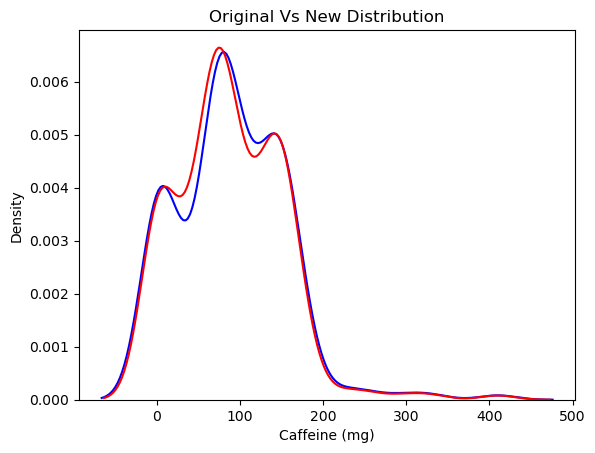

In [78]:
plt.title("Original Vs New Distribution")
sns.kdeplot(old,color='b')
sns.kdeplot(data['Caffeine (mg)'],color='r')

<Axes: >

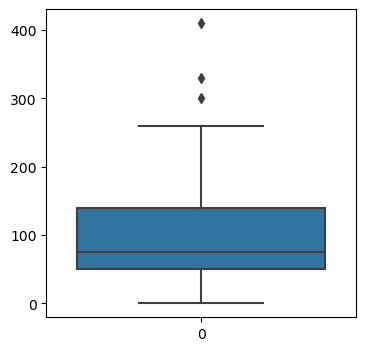

In [79]:
plt.figure(figsize=(4,4))
sns.boxplot(data['Caffeine (mg)'])

# Univariate Analysis

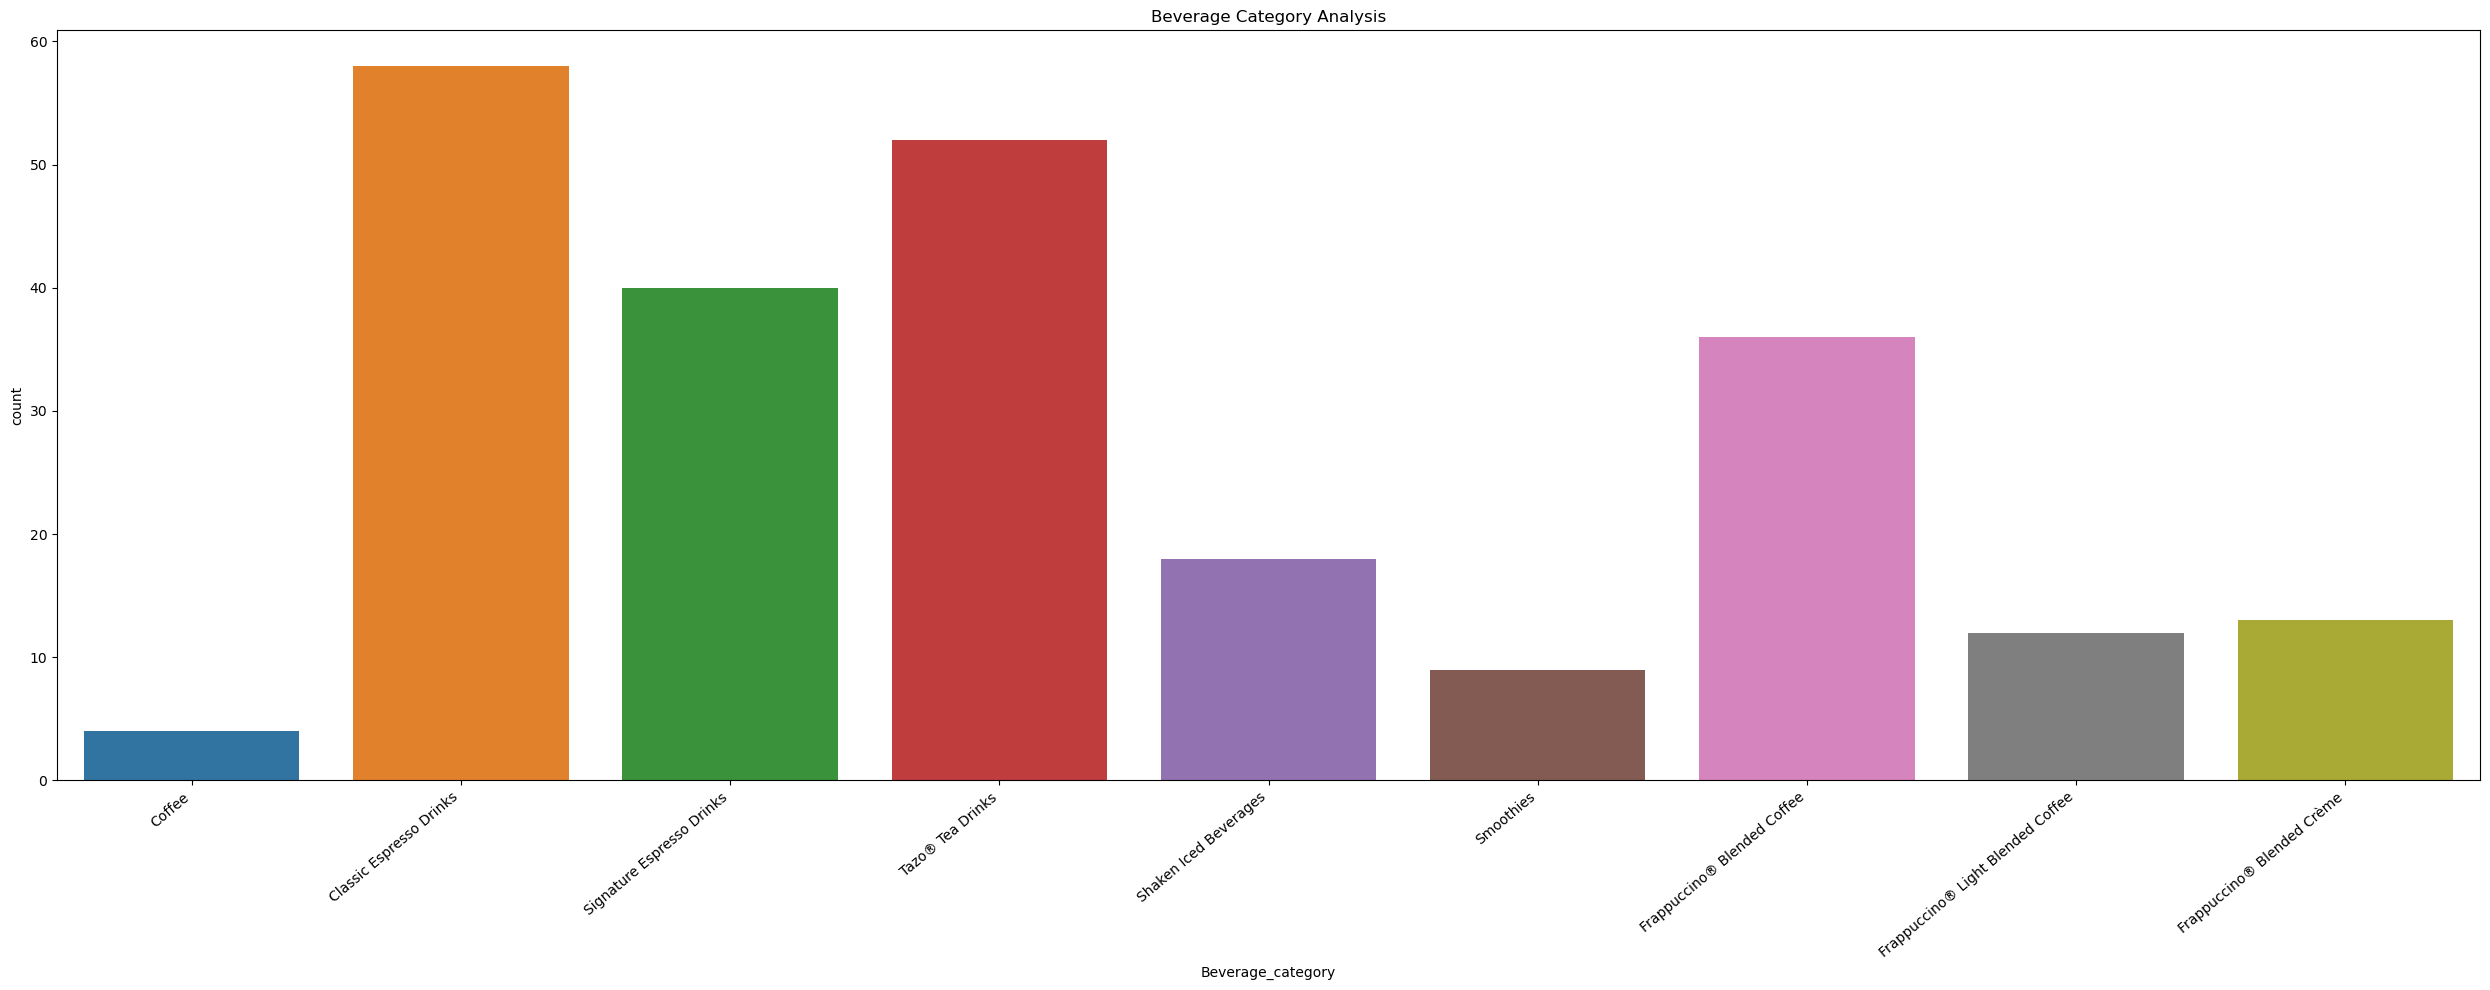

In [80]:
plt.figure(figsize=(25,10))
plt.title("Beverage Category Analysis")
ax = sns.countplot(x=data["Beverage_category"], data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

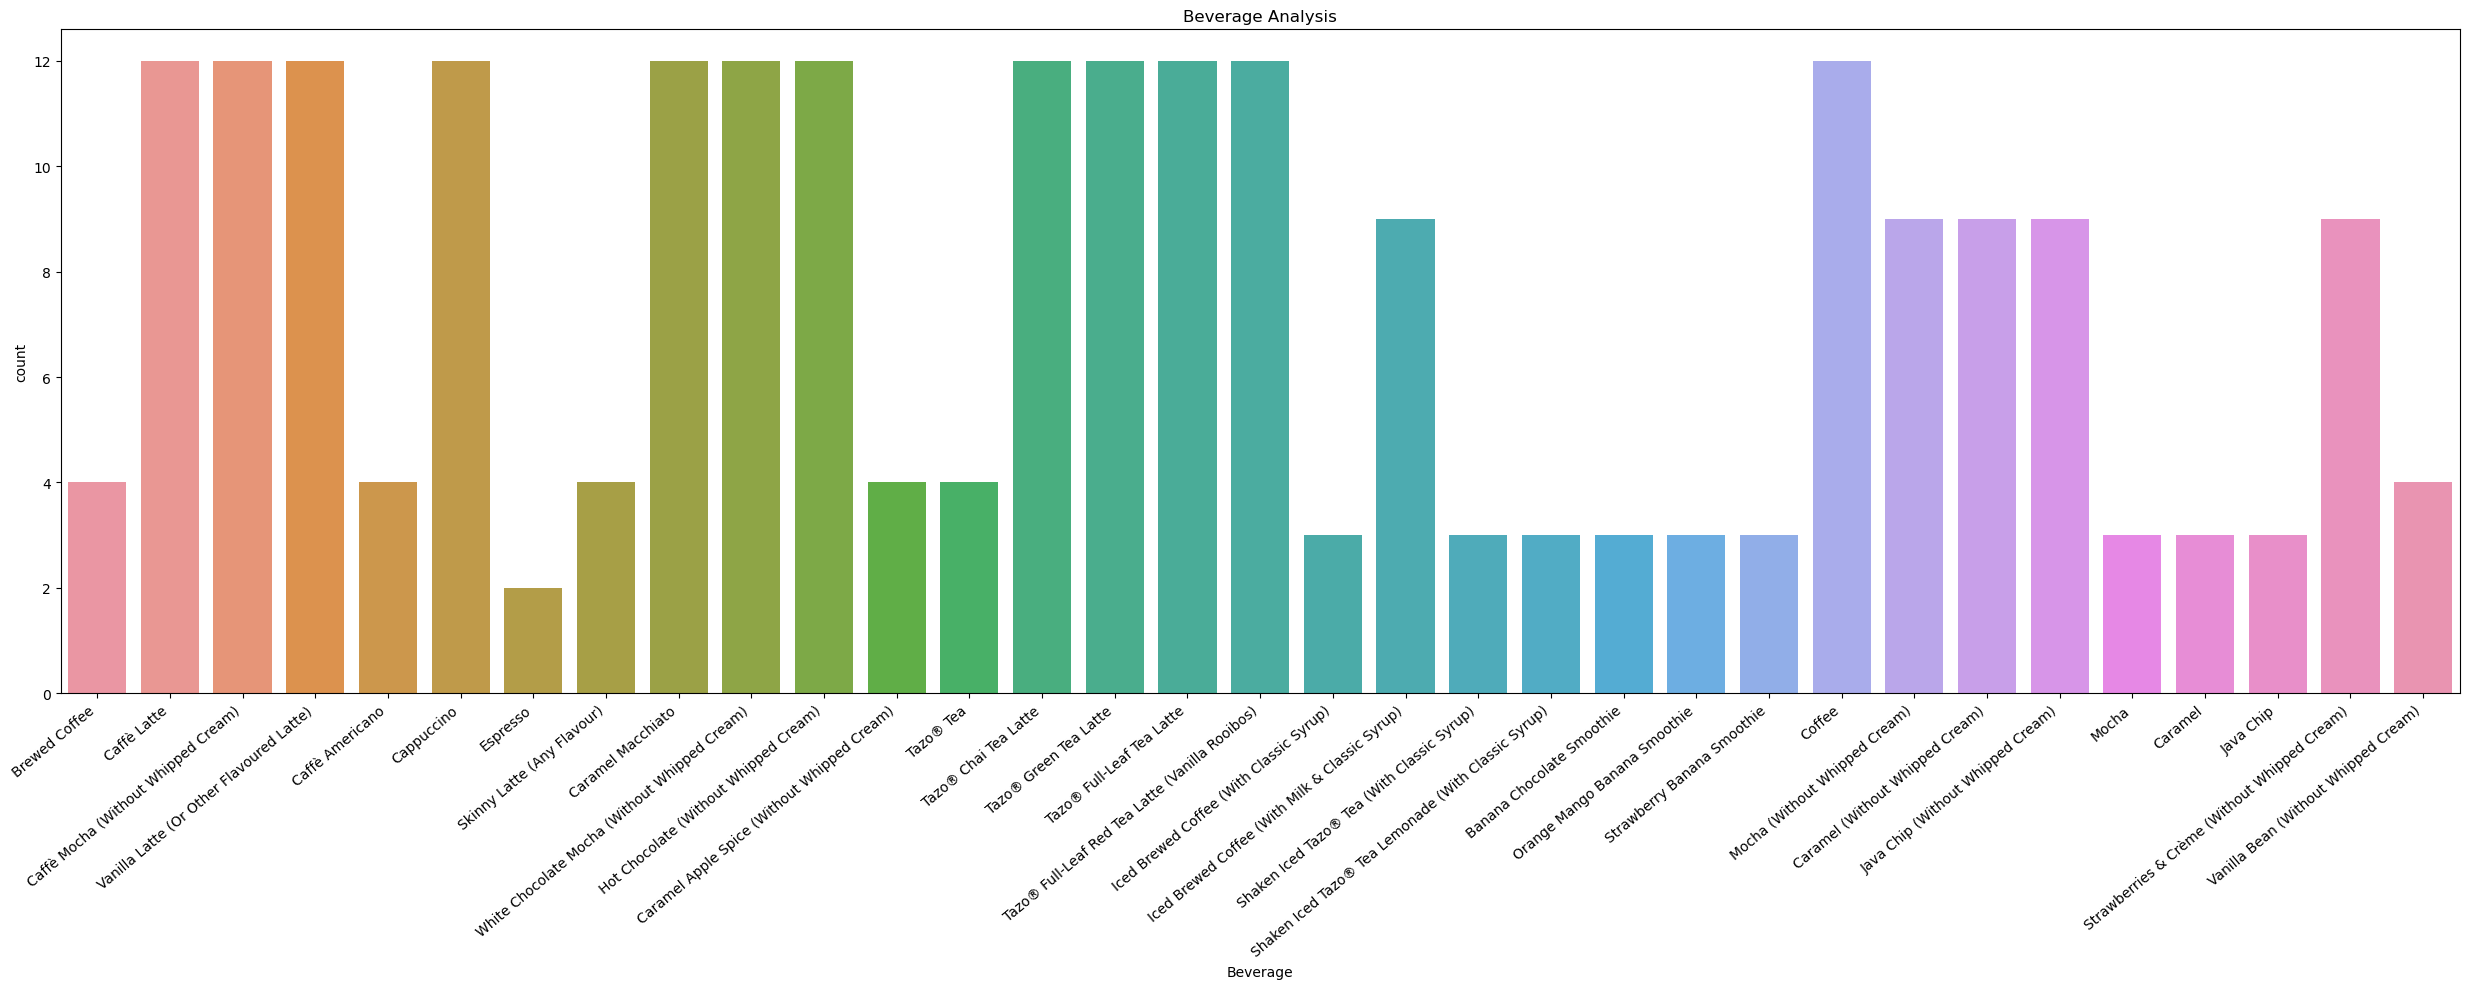

In [81]:
plt.figure(figsize=(25,10))
plt.title("Beverage Analysis")
ax = sns.countplot(x=data["Beverage"], data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

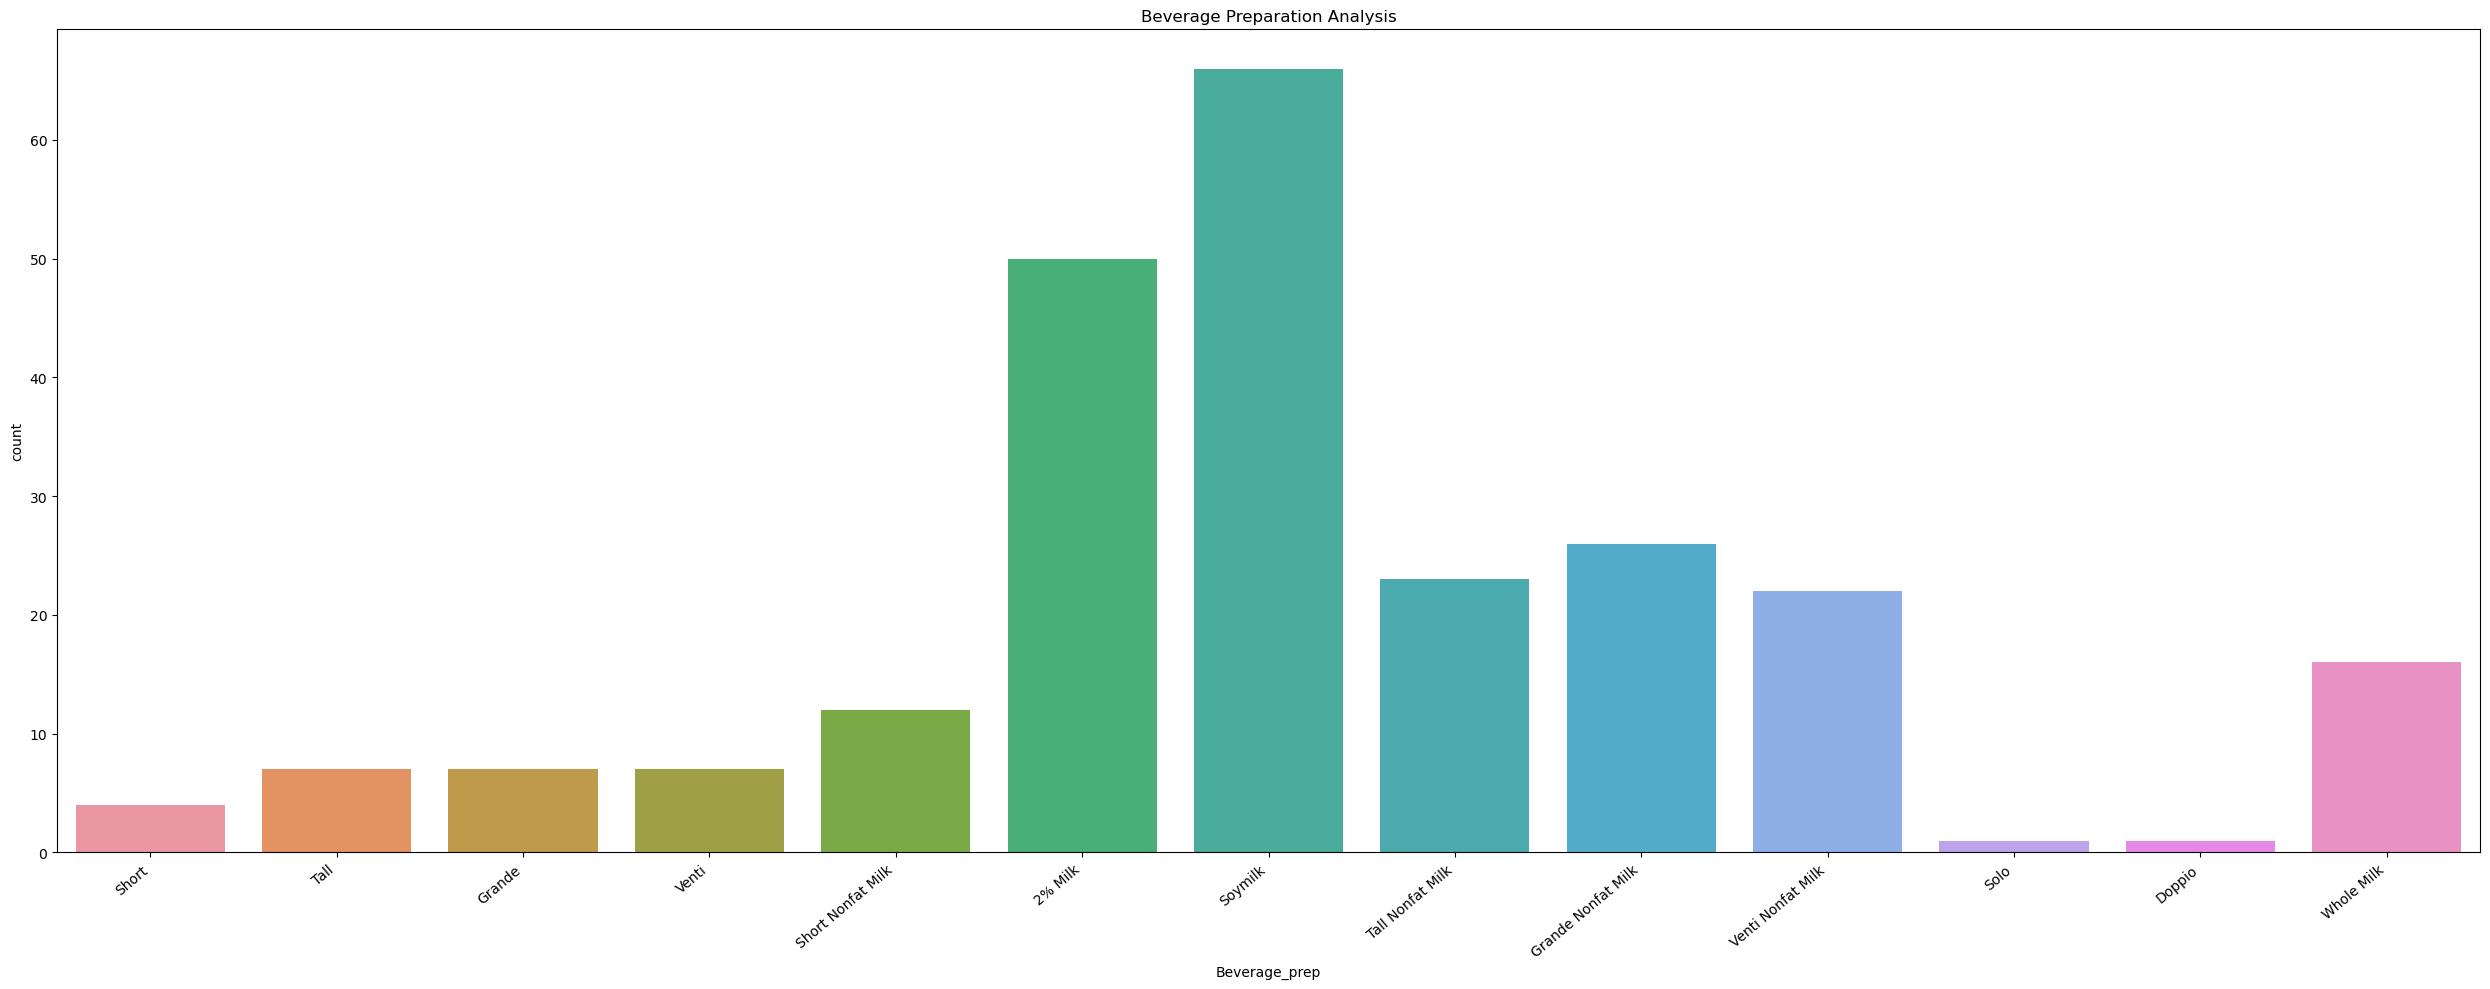

In [82]:
plt.figure(figsize=(25,10))
plt.title("Beverage Preparation Analysis")
ax = sns.countplot(x=data["Beverage_prep"], data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

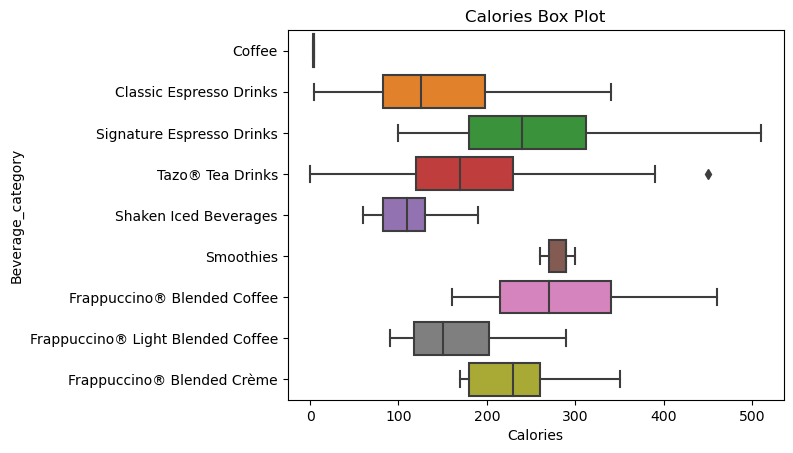

In [83]:
#for col in numeric_col:
#   subplot()
plt.title("Calories Box Plot")
sns.boxplot(data=data,x=data['Calories'],y=data['Beverage_category'])
plt.show()

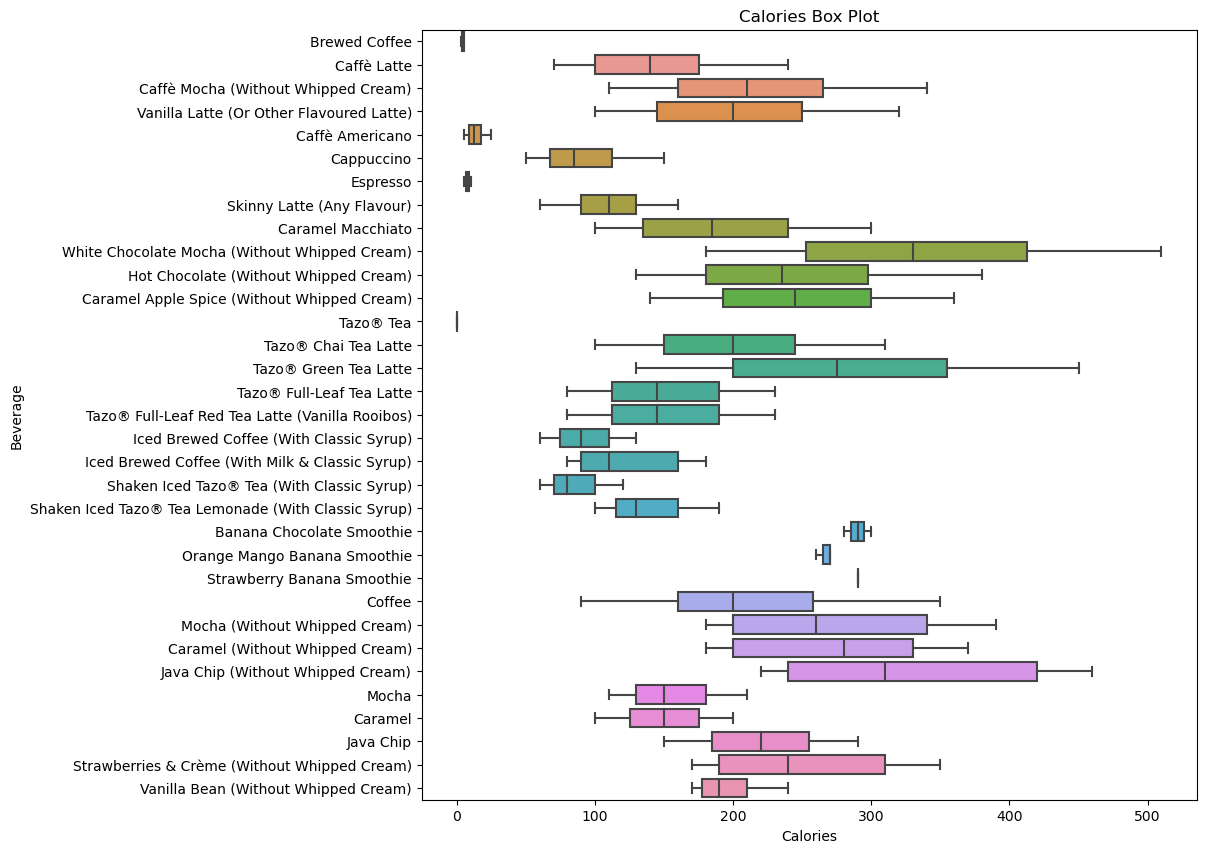

In [84]:
#for col in numeric_col:
#   subplot()
plt.figure(figsize=(10,10))
plt.title("Calories Box Plot")
sns.boxplot(data=data,x=data['Calories'],y=data['Beverage'])
plt.show()

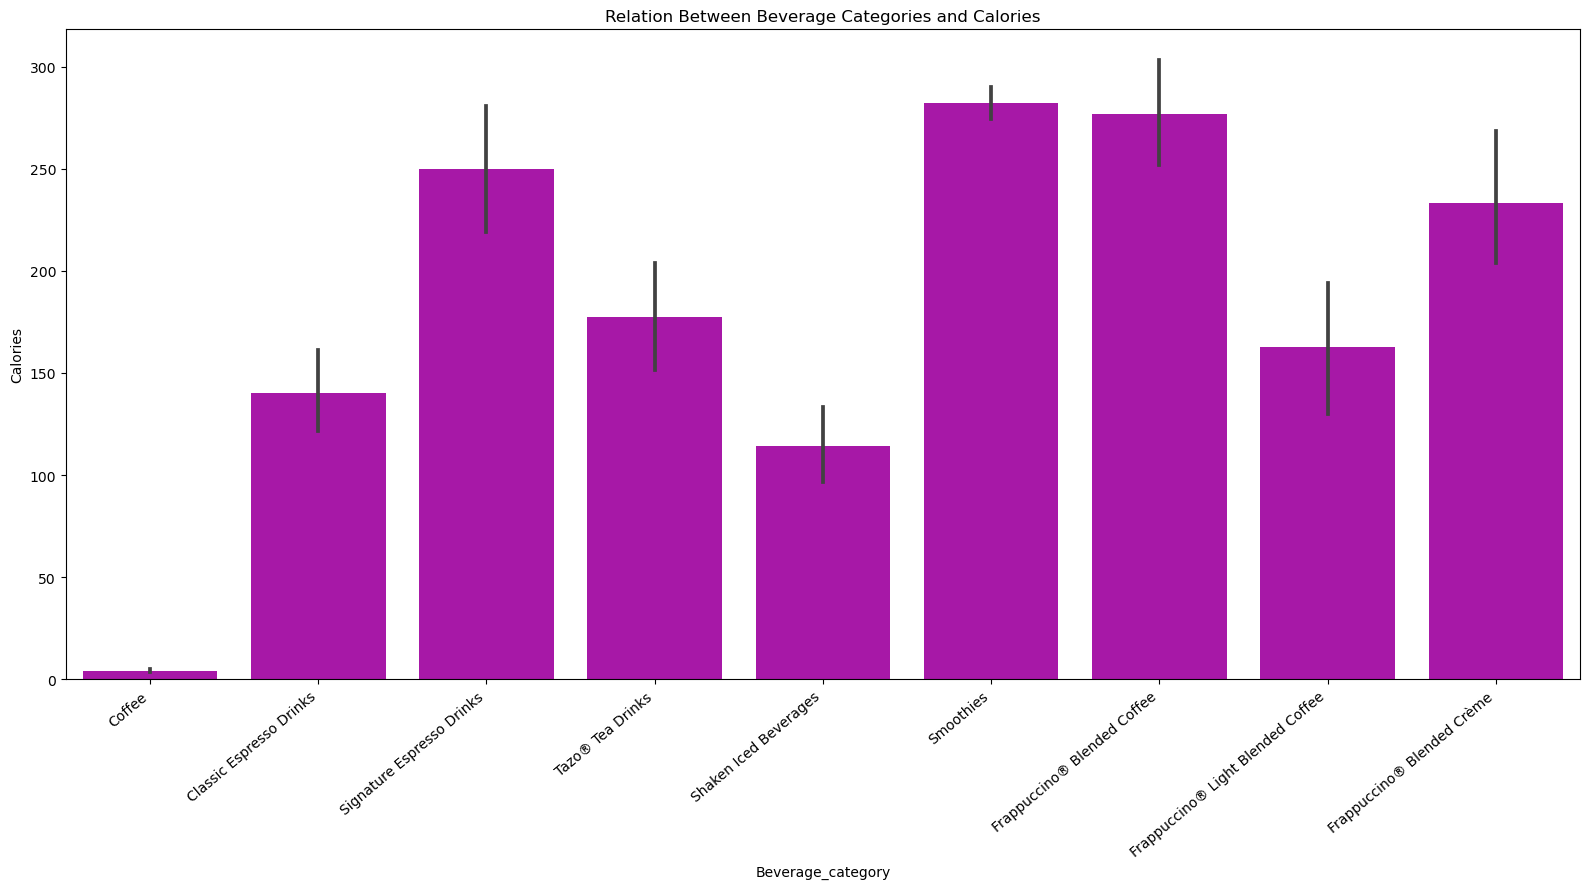

In [85]:
plt.figure(figsize=(16,9))
plt.title("Relation Between Beverage Categories and Calories")
ax=sns.barplot(data=data,x=data['Beverage_category'],y=data['Calories'],color='m')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.tight_layout()
plt.show()

In [86]:
data['Beverage_category'].value_counts()

Classic Espresso Drinks              58
Tazo® Tea Drinks                     52
Signature Espresso Drinks            40
Frappuccino® Blended Coffee          36
Shaken Iced Beverages                18
Frappuccino® Blended Crème           13
Frappuccino® Light Blended Coffee    12
Smoothies                             9
Coffee                                4
Name: Beverage_category, dtype: int64

In [87]:
numeric_col=data.select_dtypes(include=['int64','float64']).columns
print(numeric_col)
print(len(numeric_col))

Index(['Calories', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Caffeine (mg)'],
      dtype='object')
10


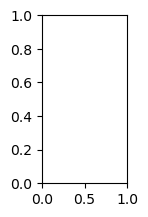

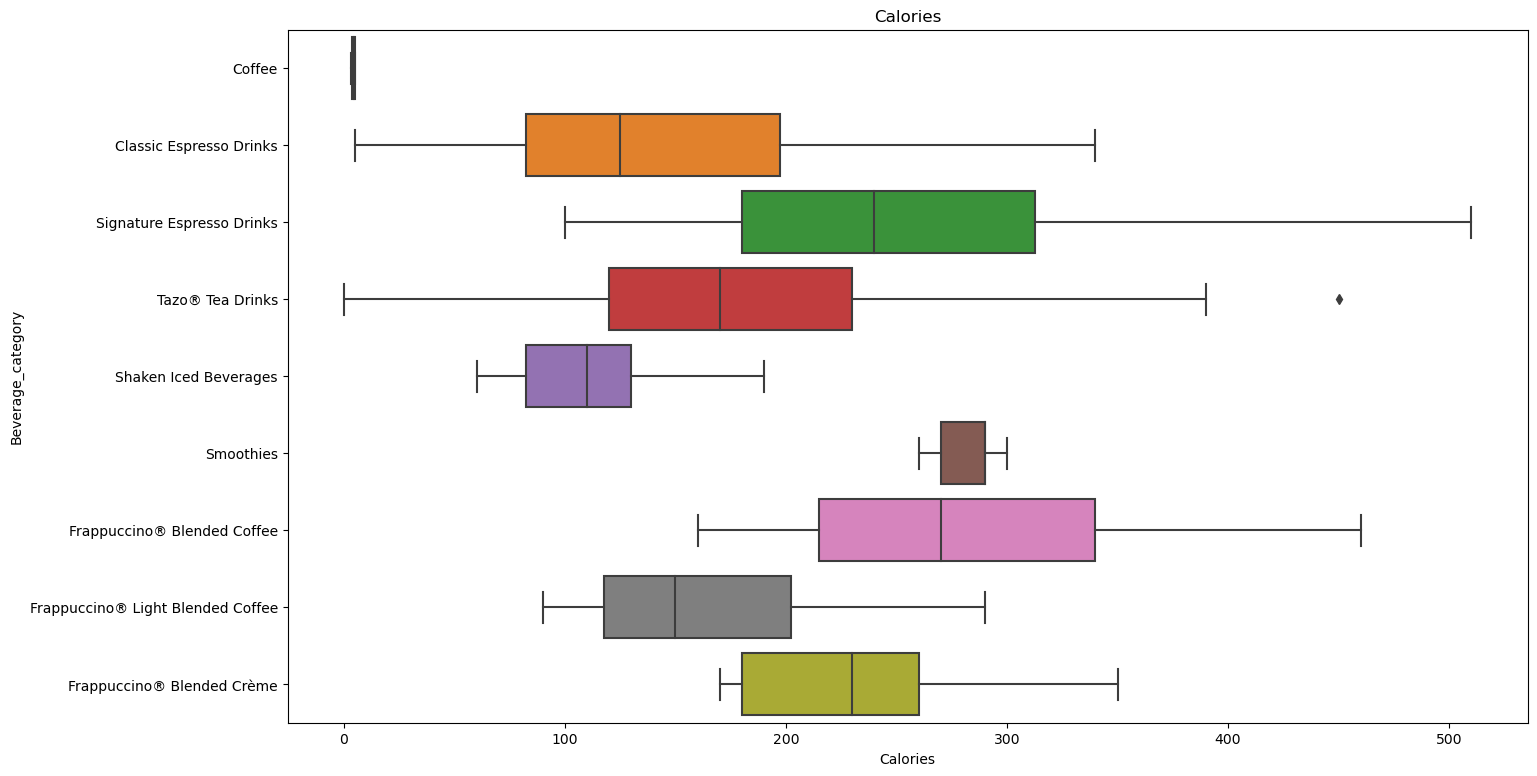

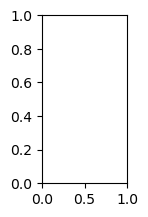

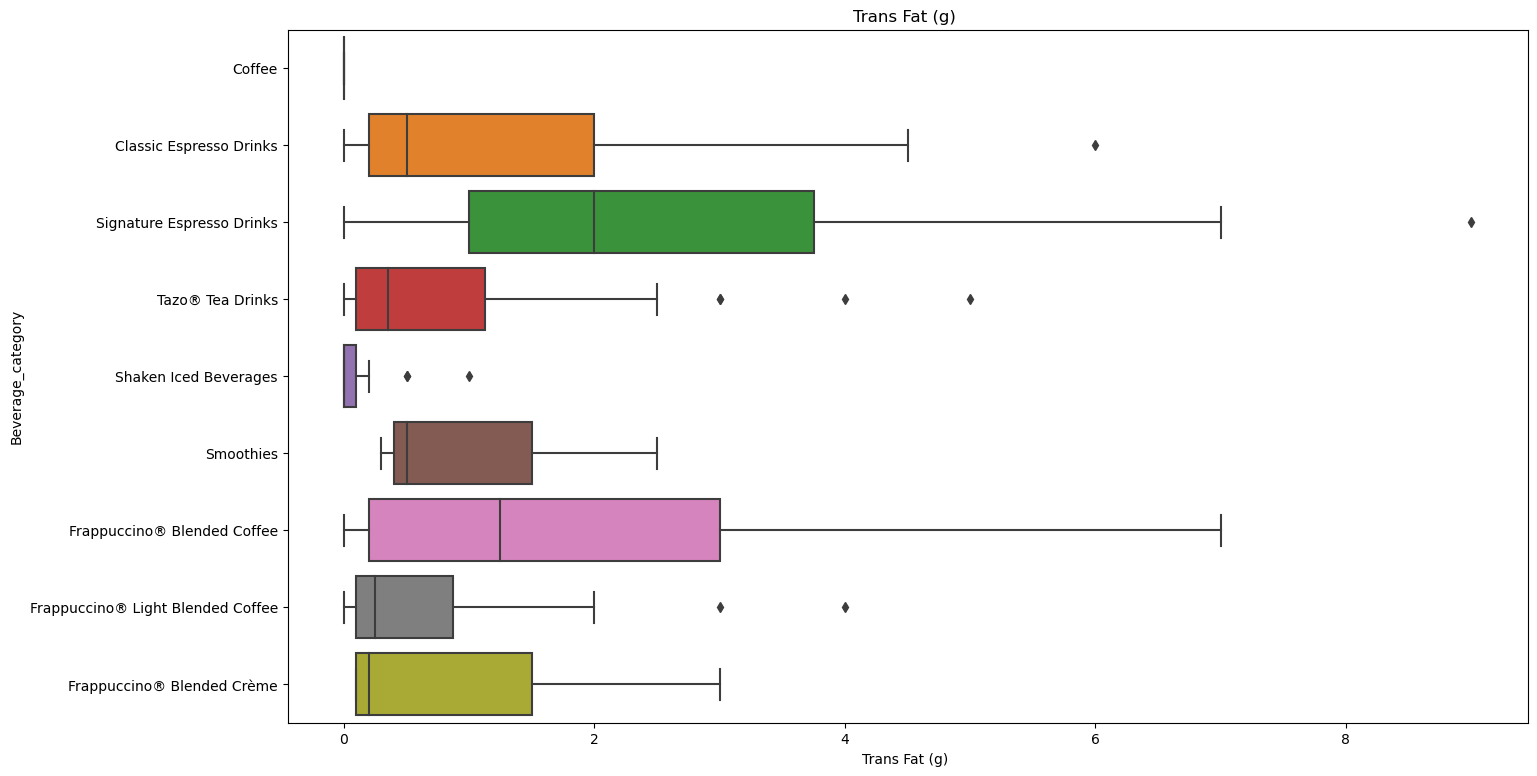

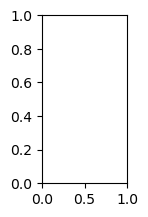

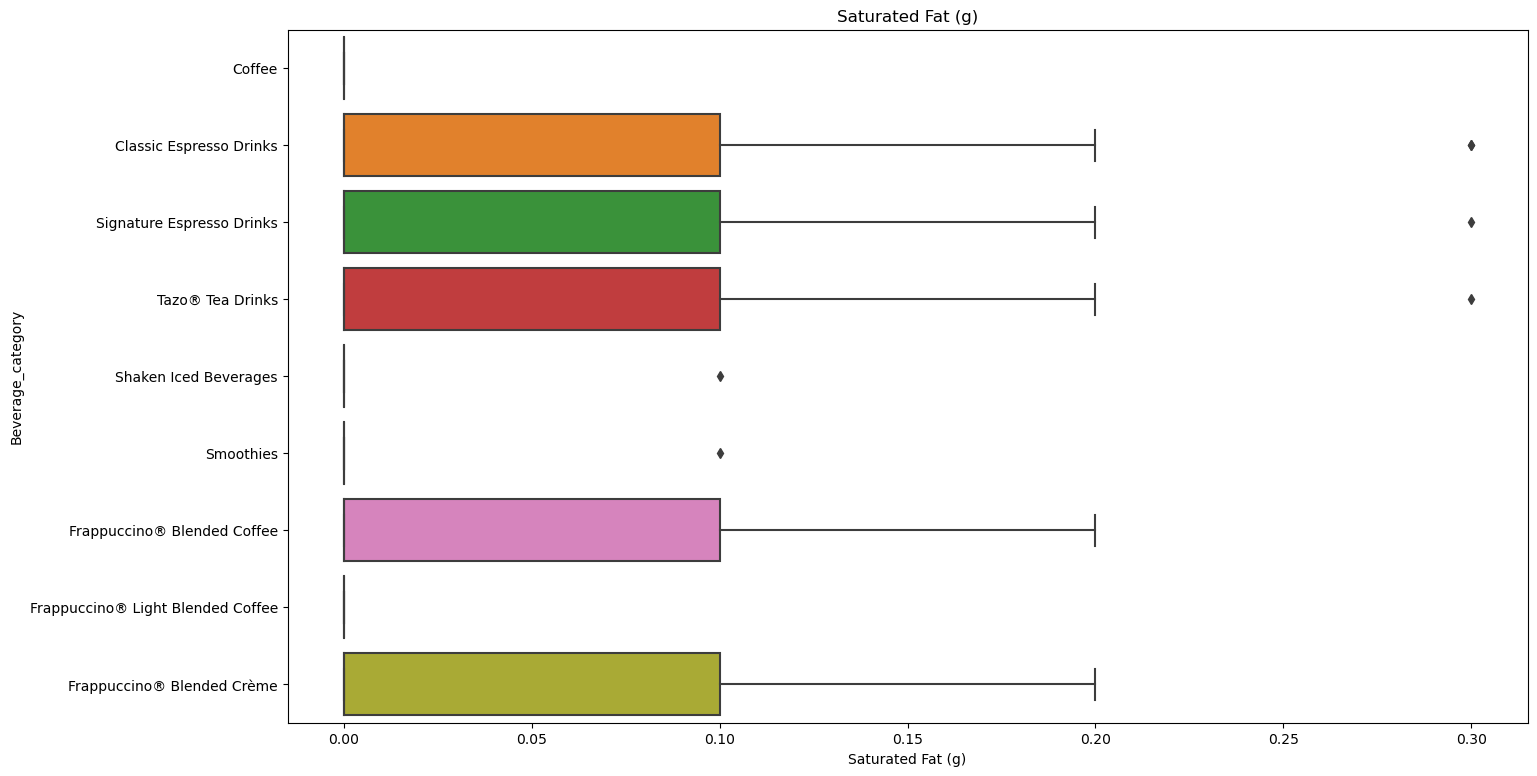

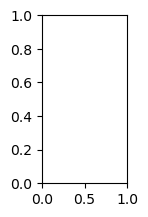

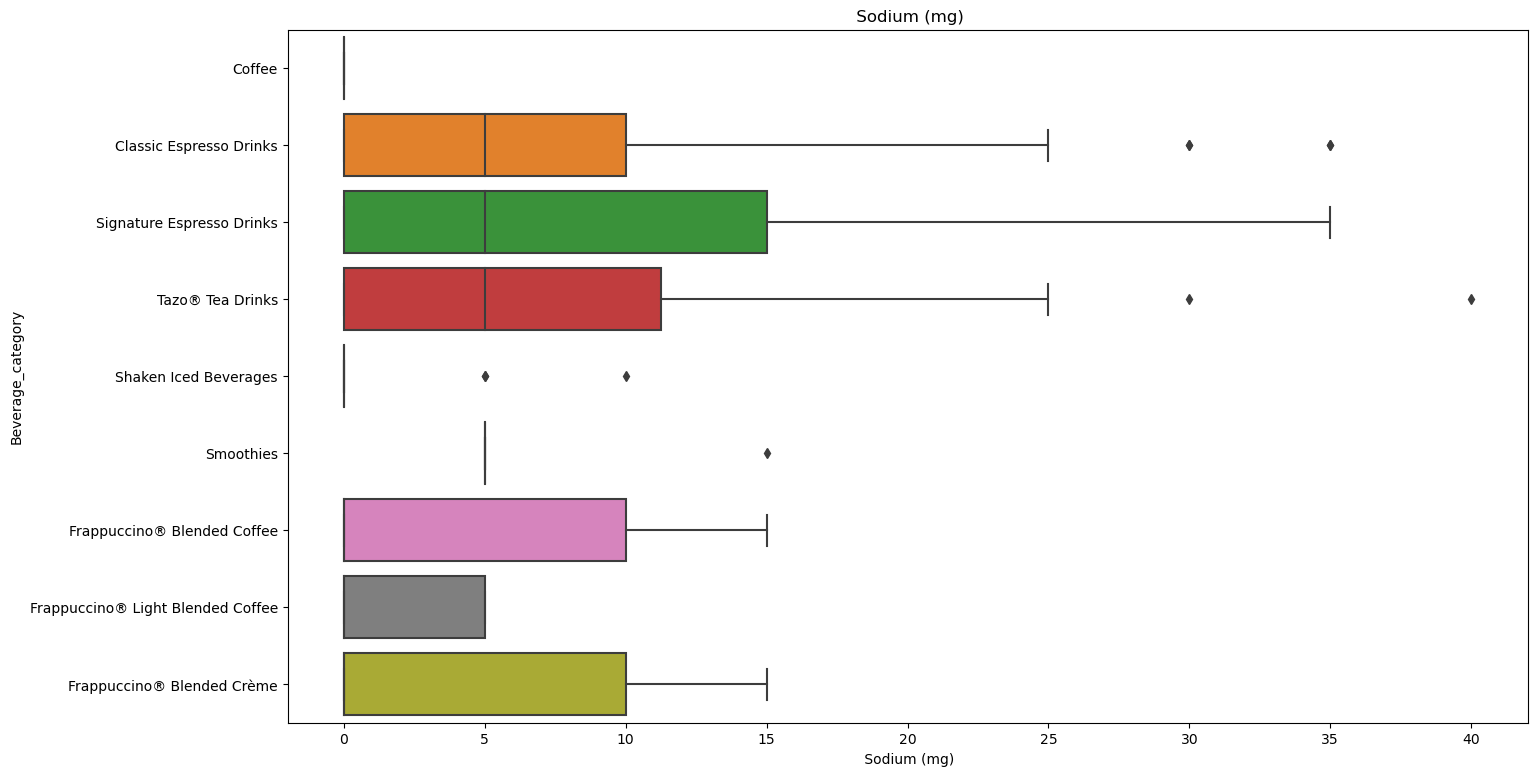

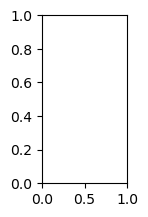

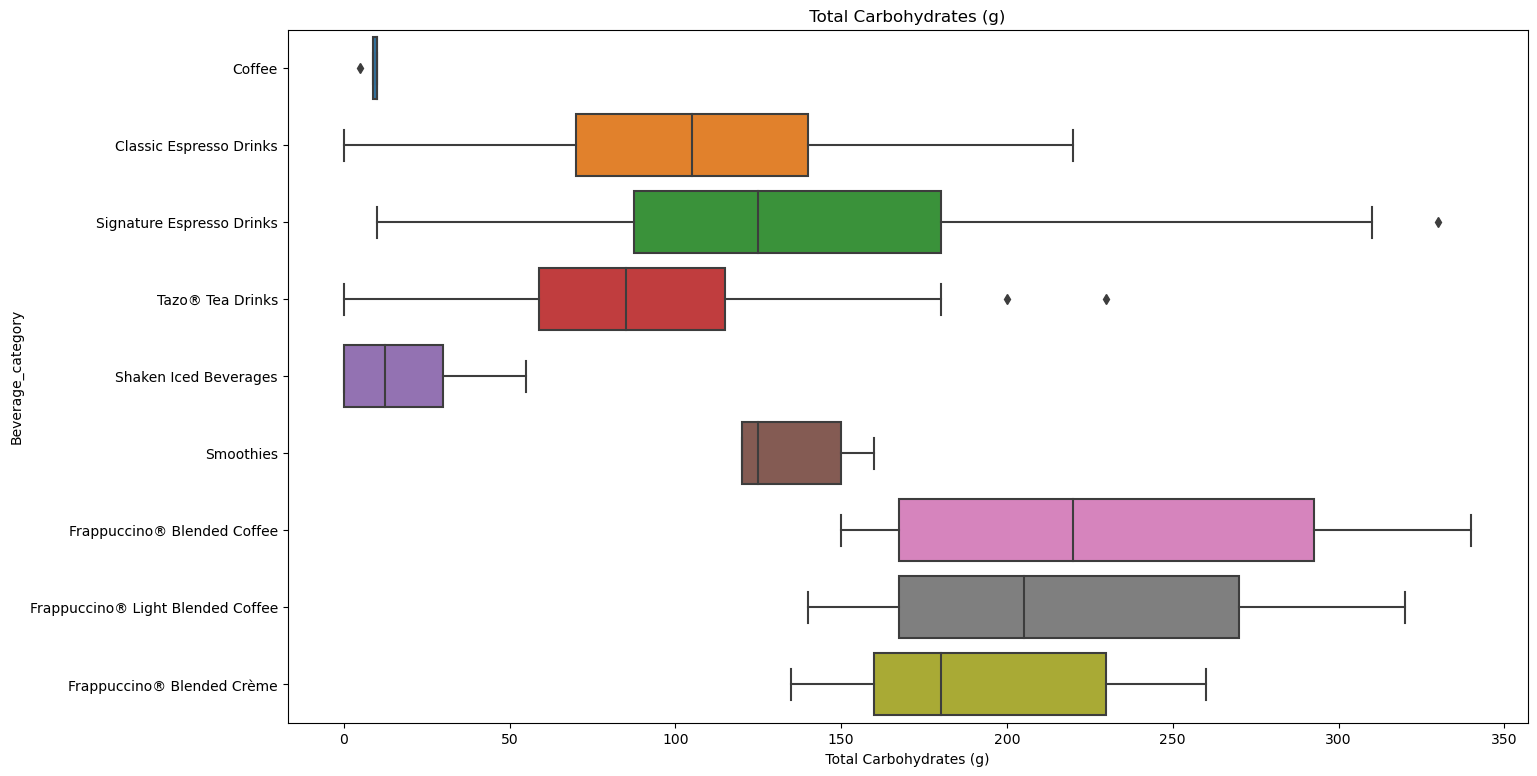

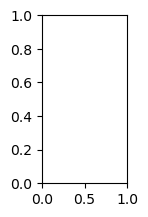

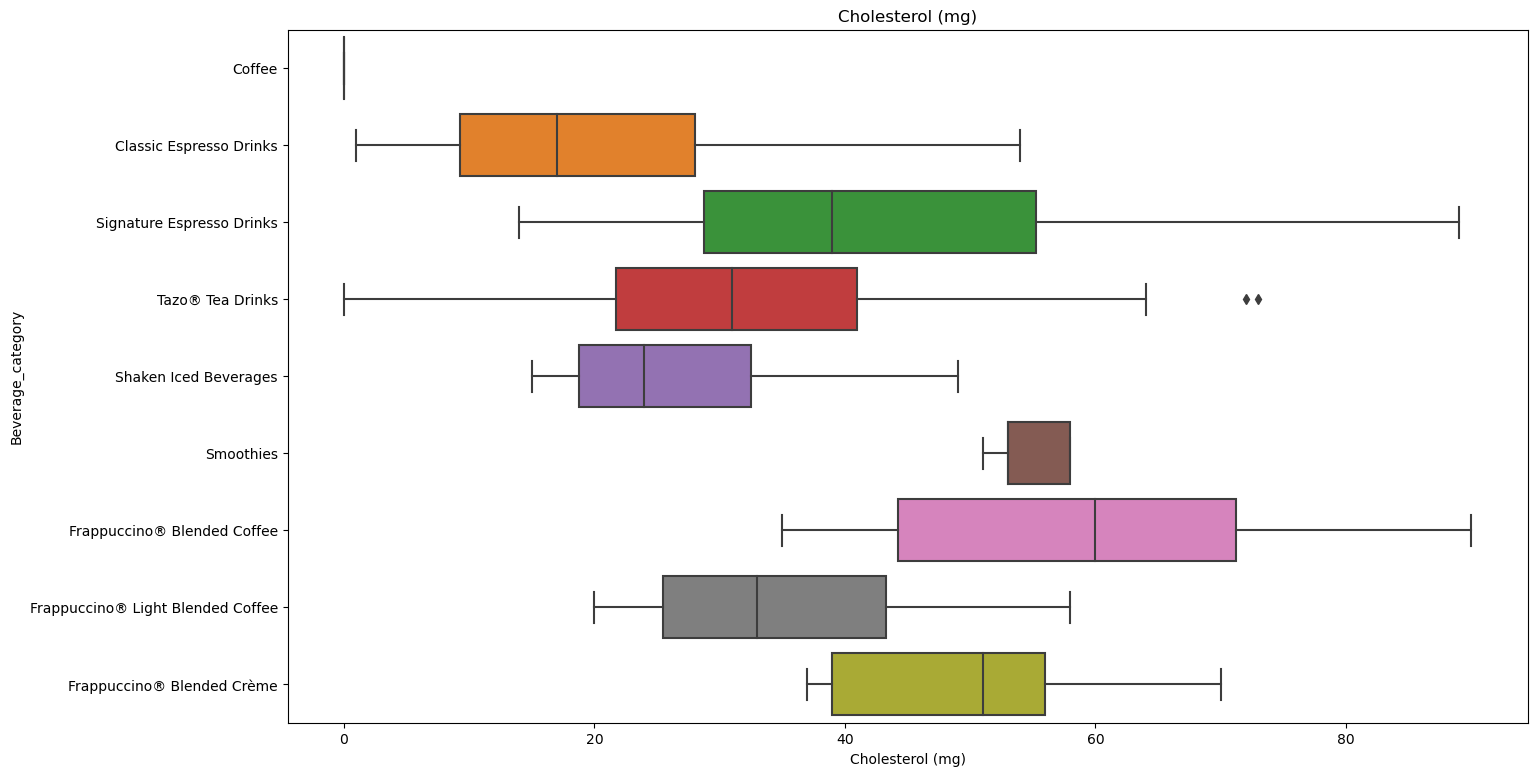

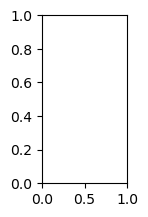

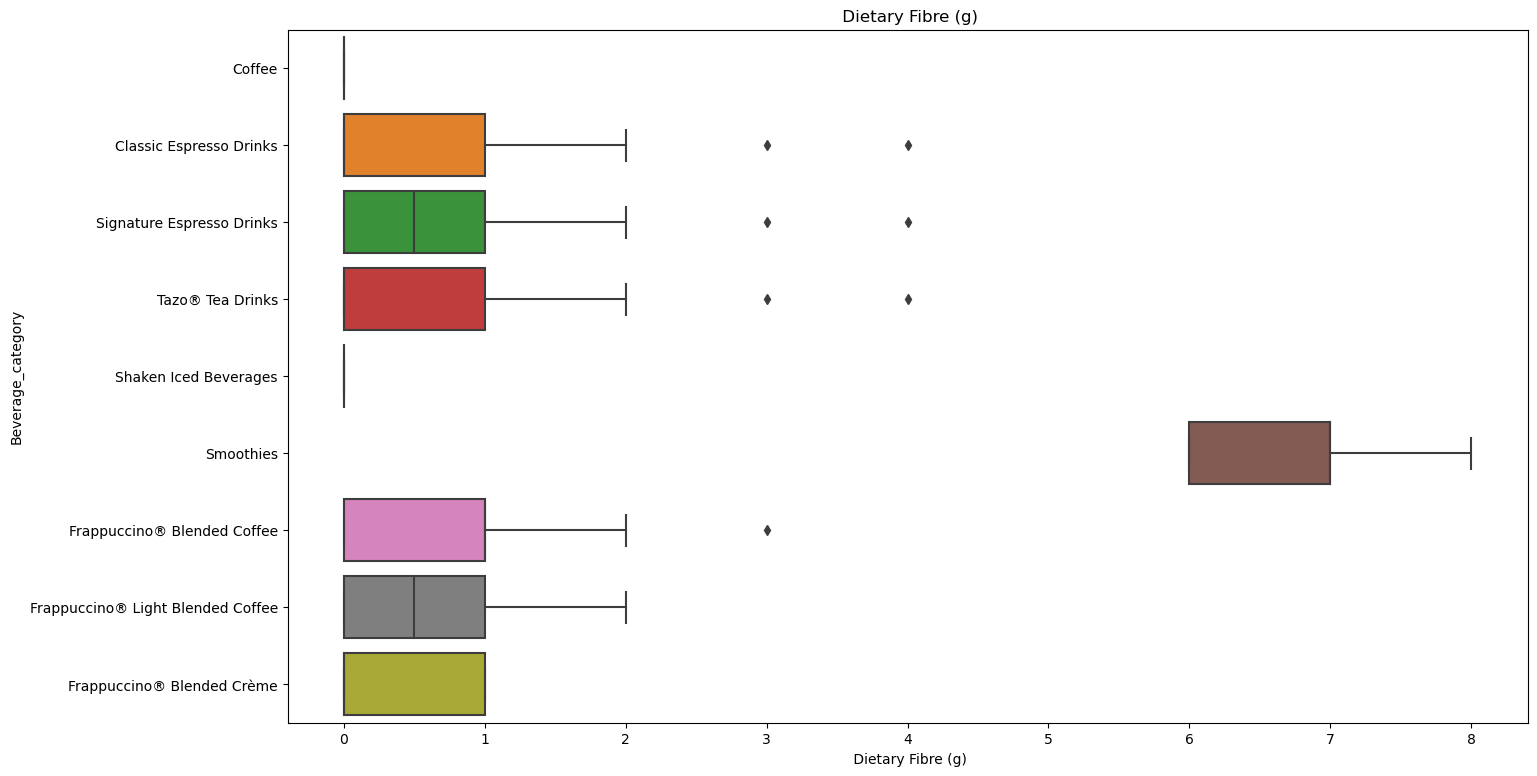

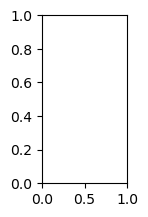

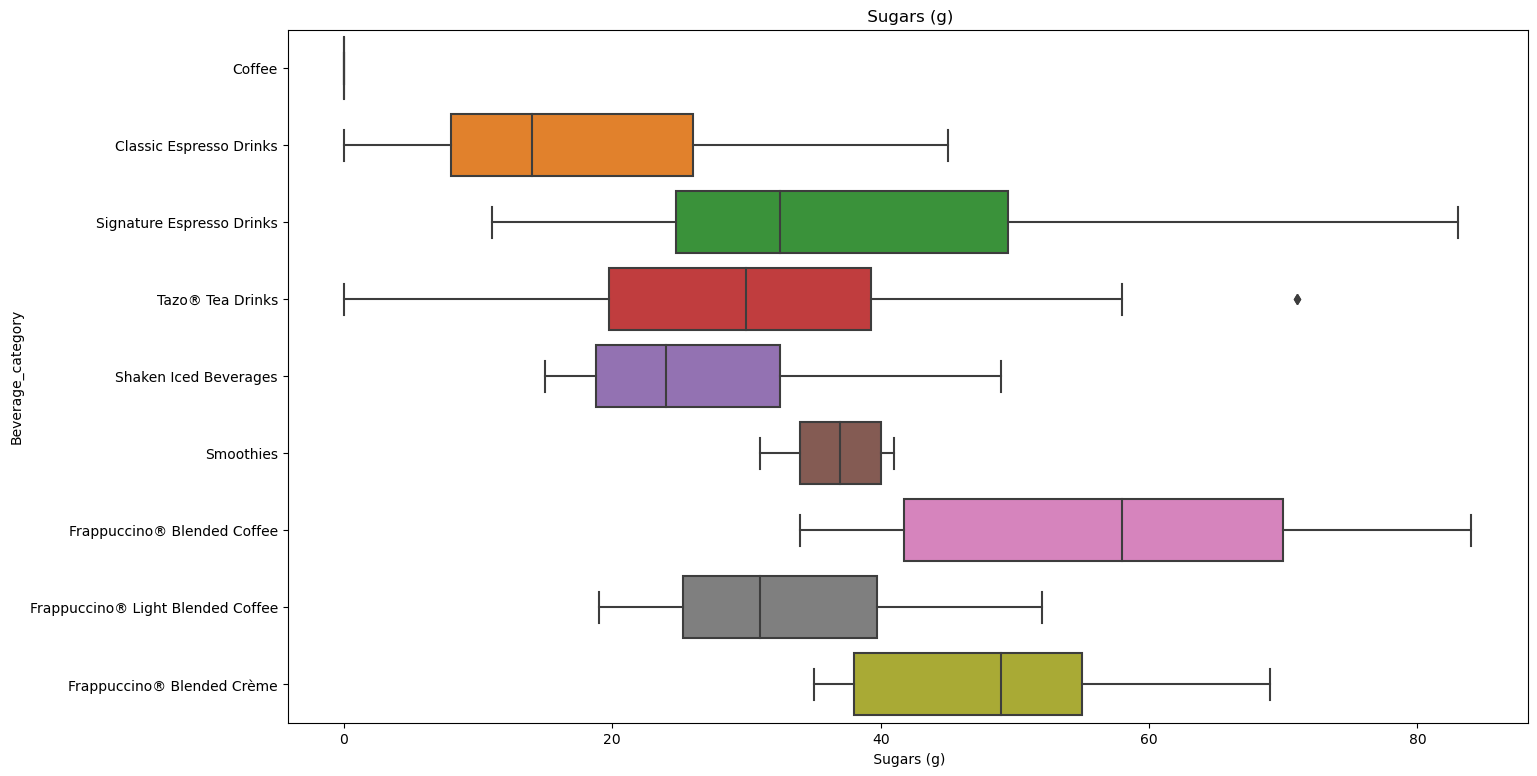

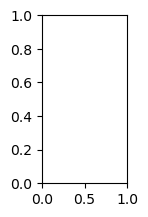

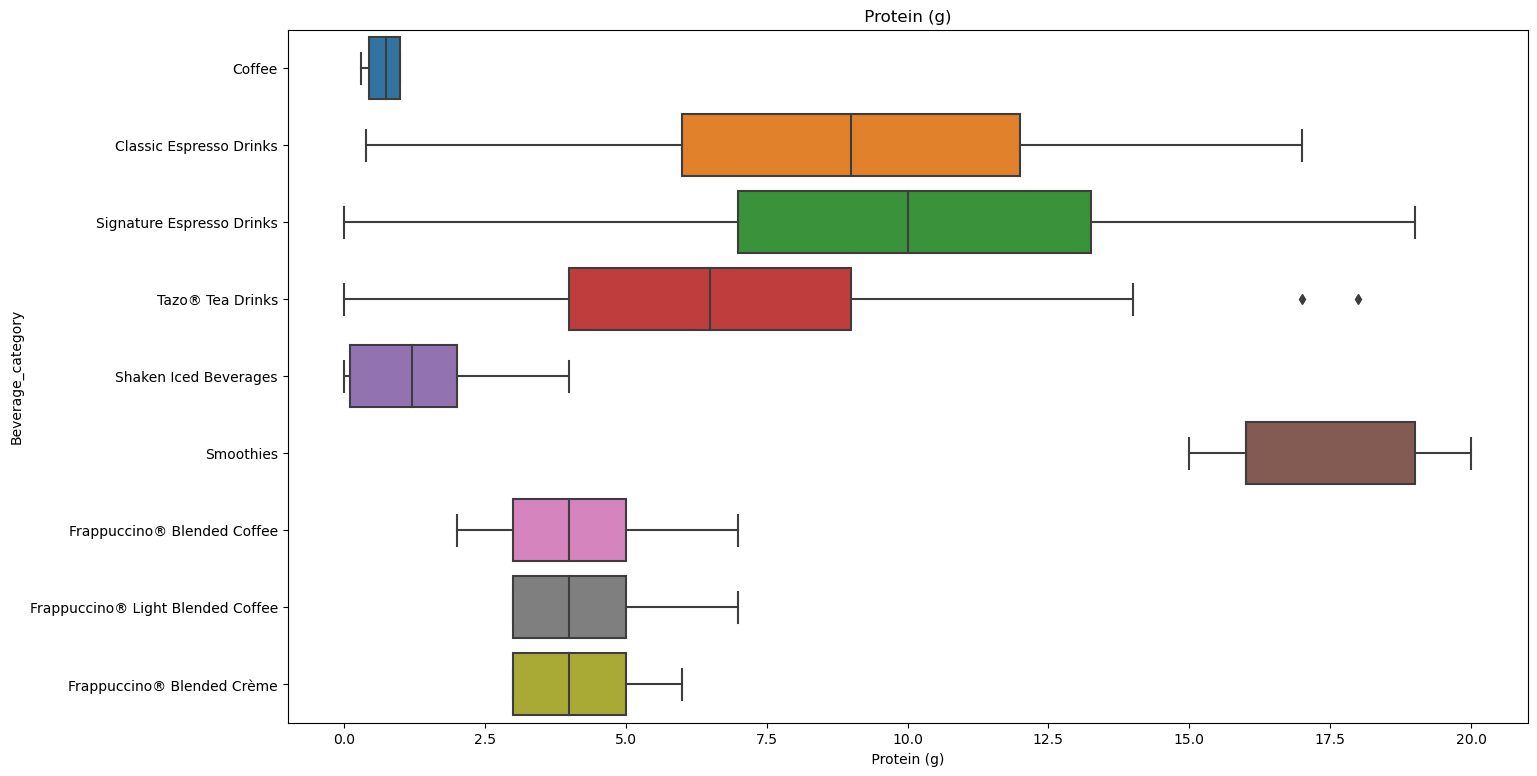

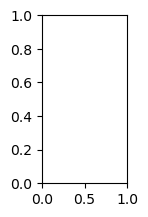

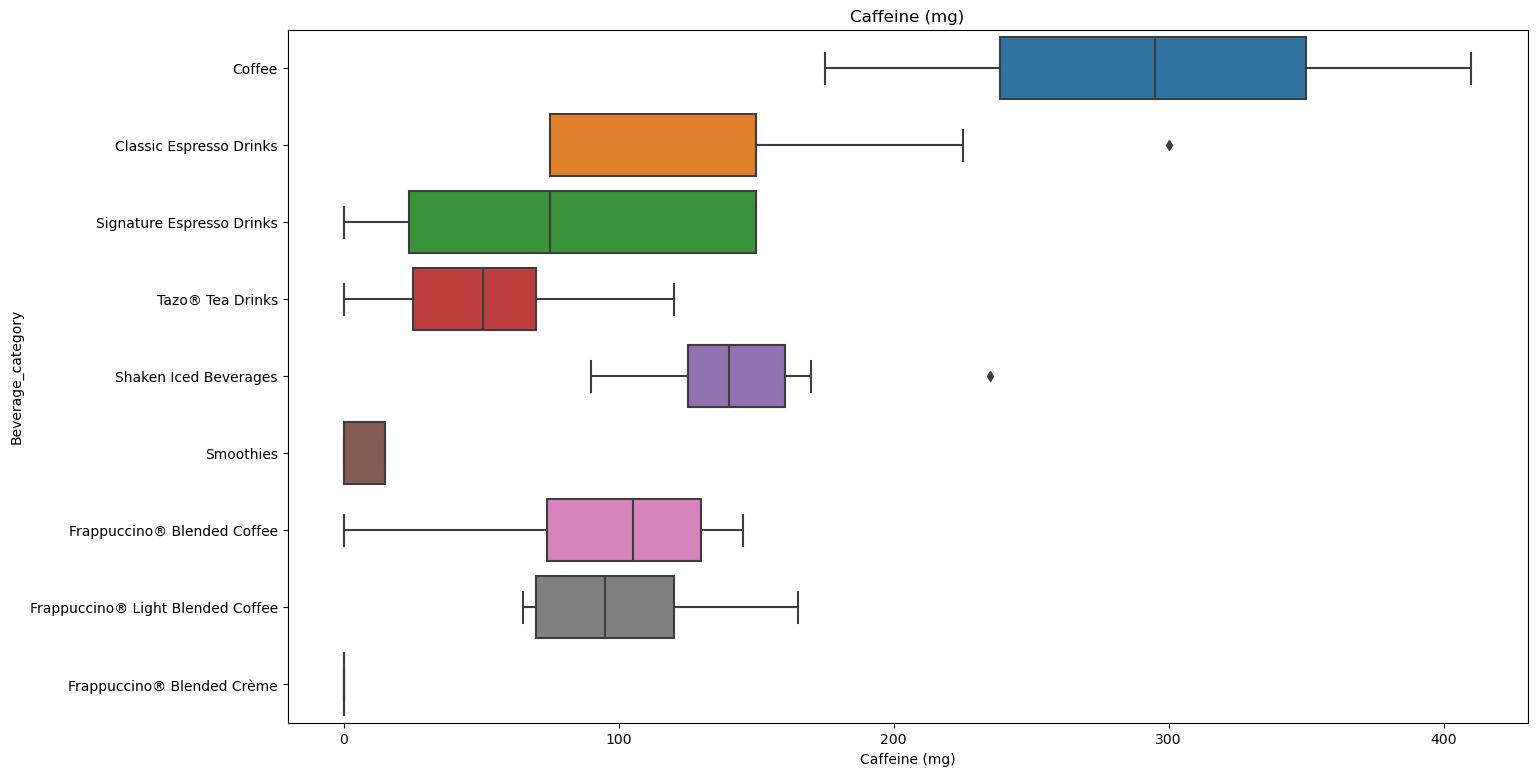

In [88]:
x=1
for cols in numeric_col:
    plt.subplot(2,5,x)
    plt.figure(figsize=(16,9))
    plt.title(cols)
    sns.boxplot(data=data,x=data[cols],y=data['Beverage_category'])
    plt.show()
    x=x+1

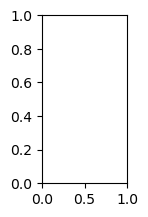

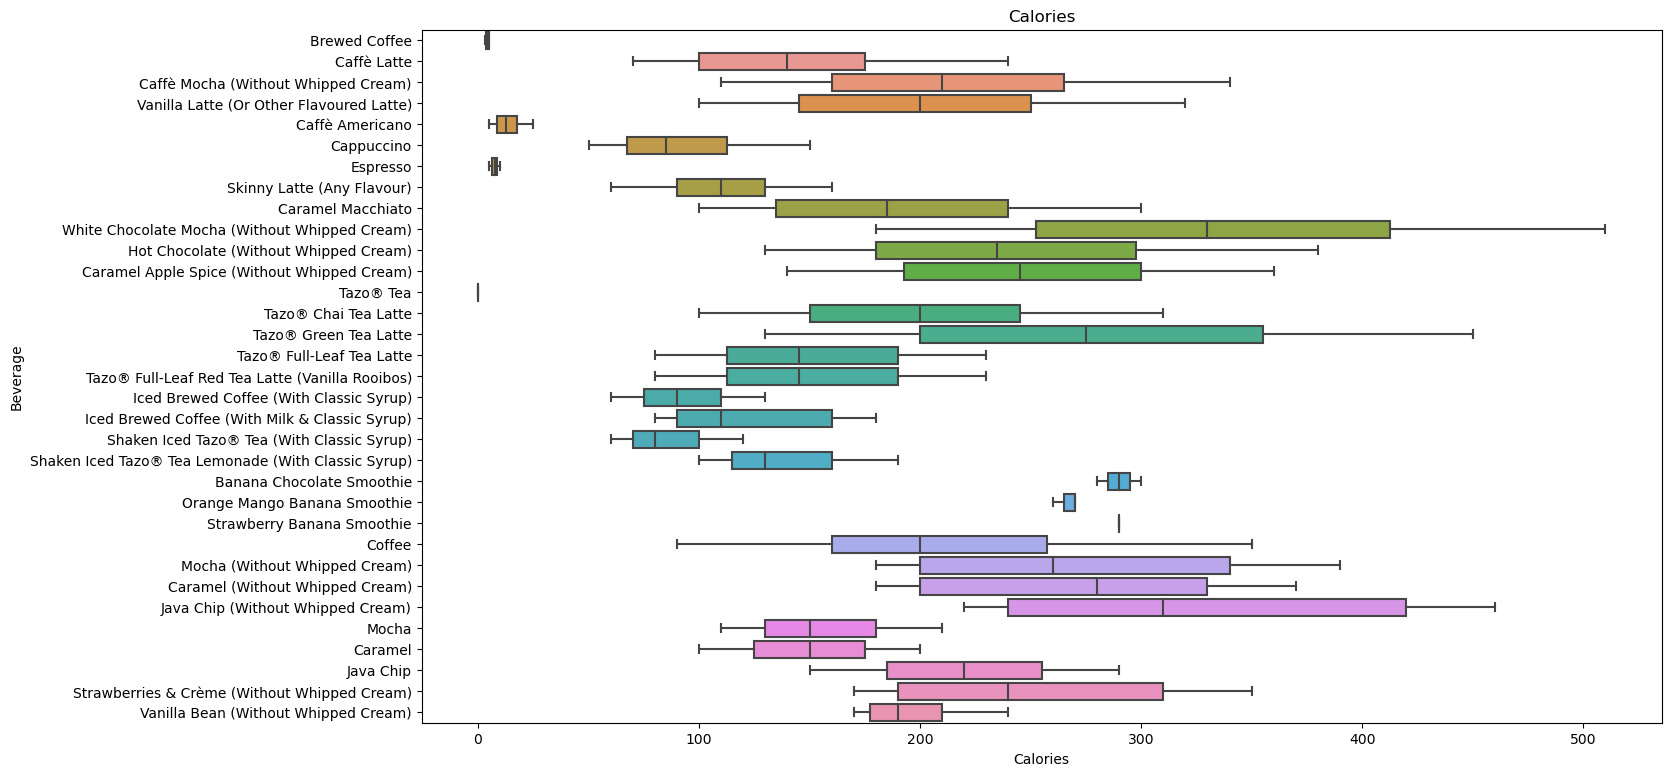

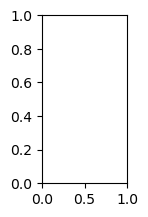

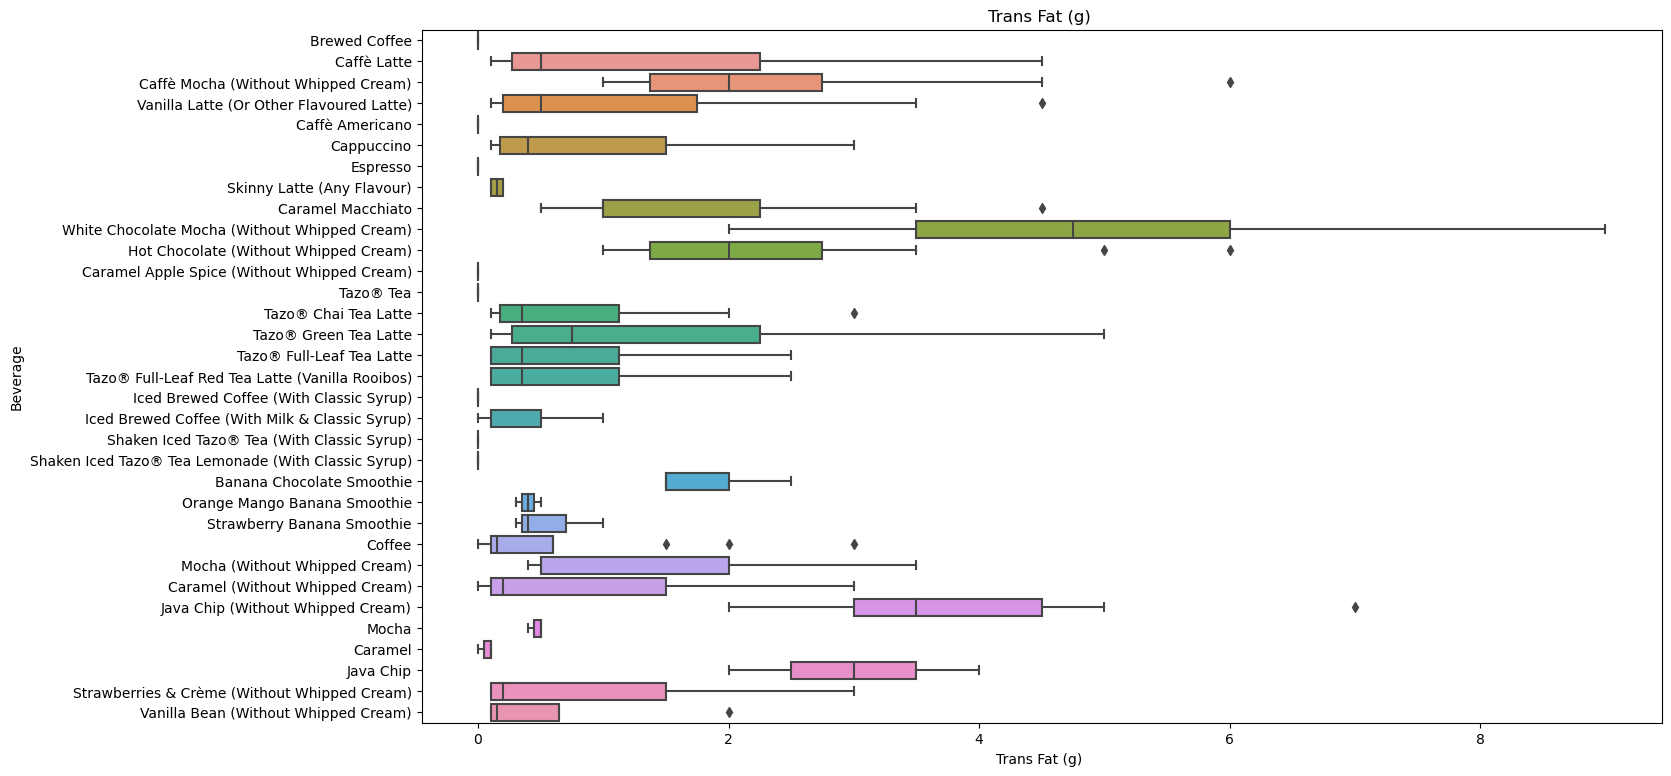

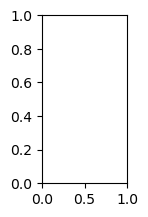

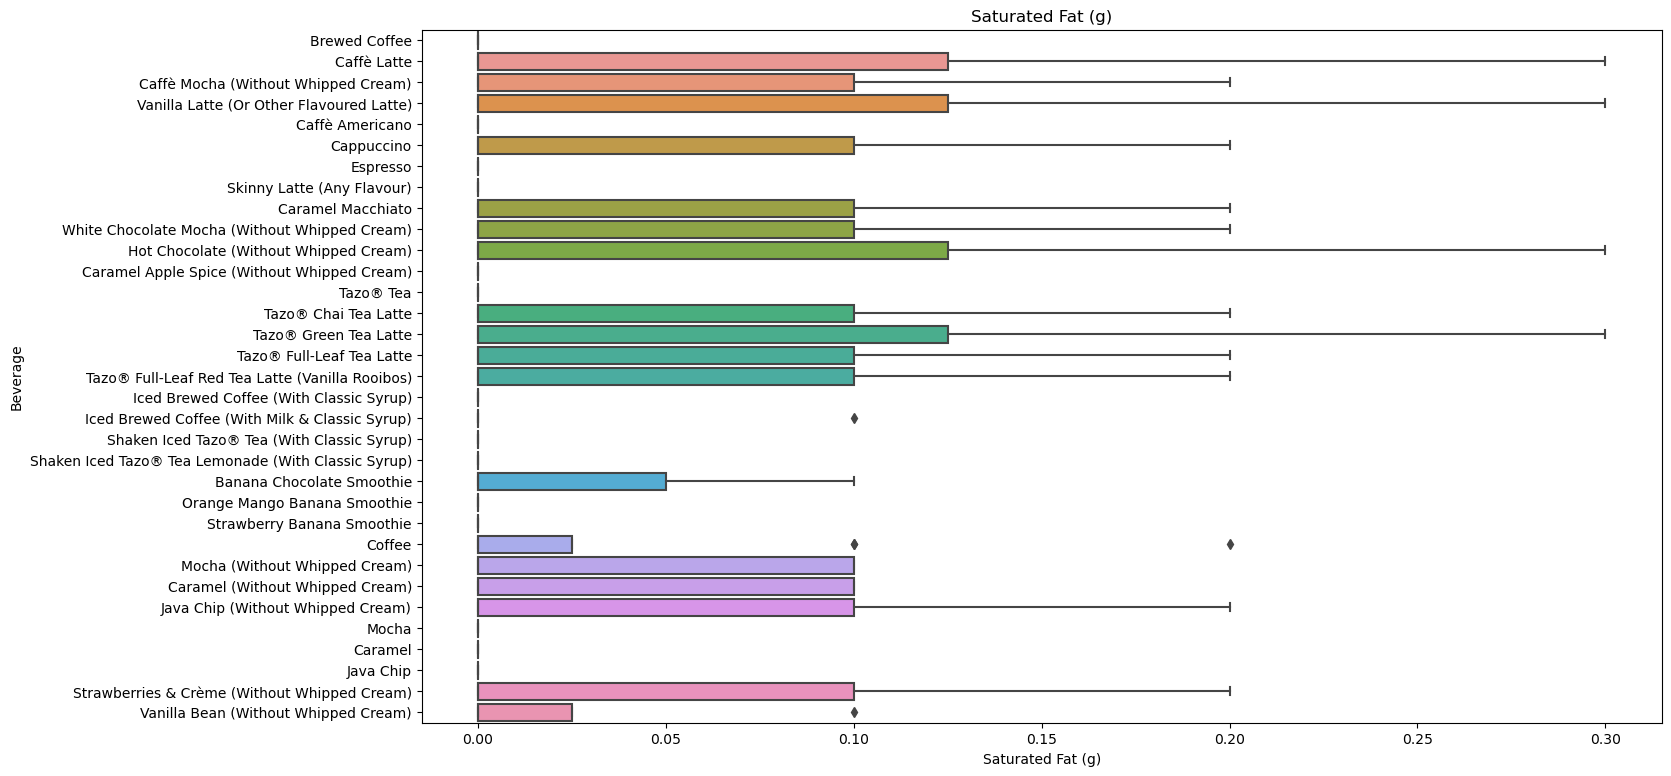

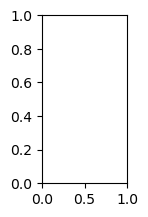

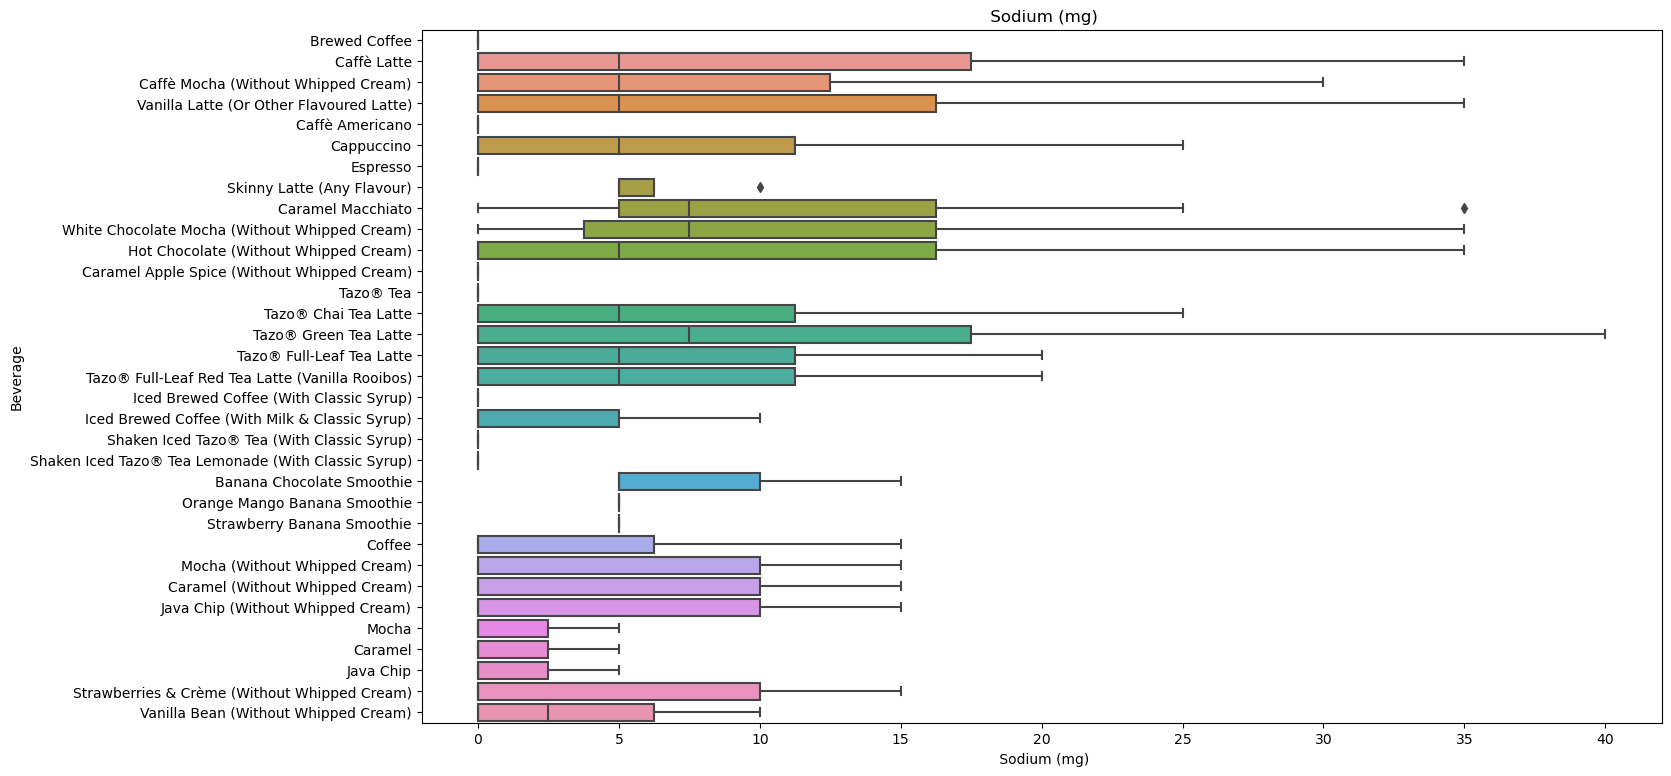

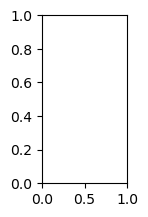

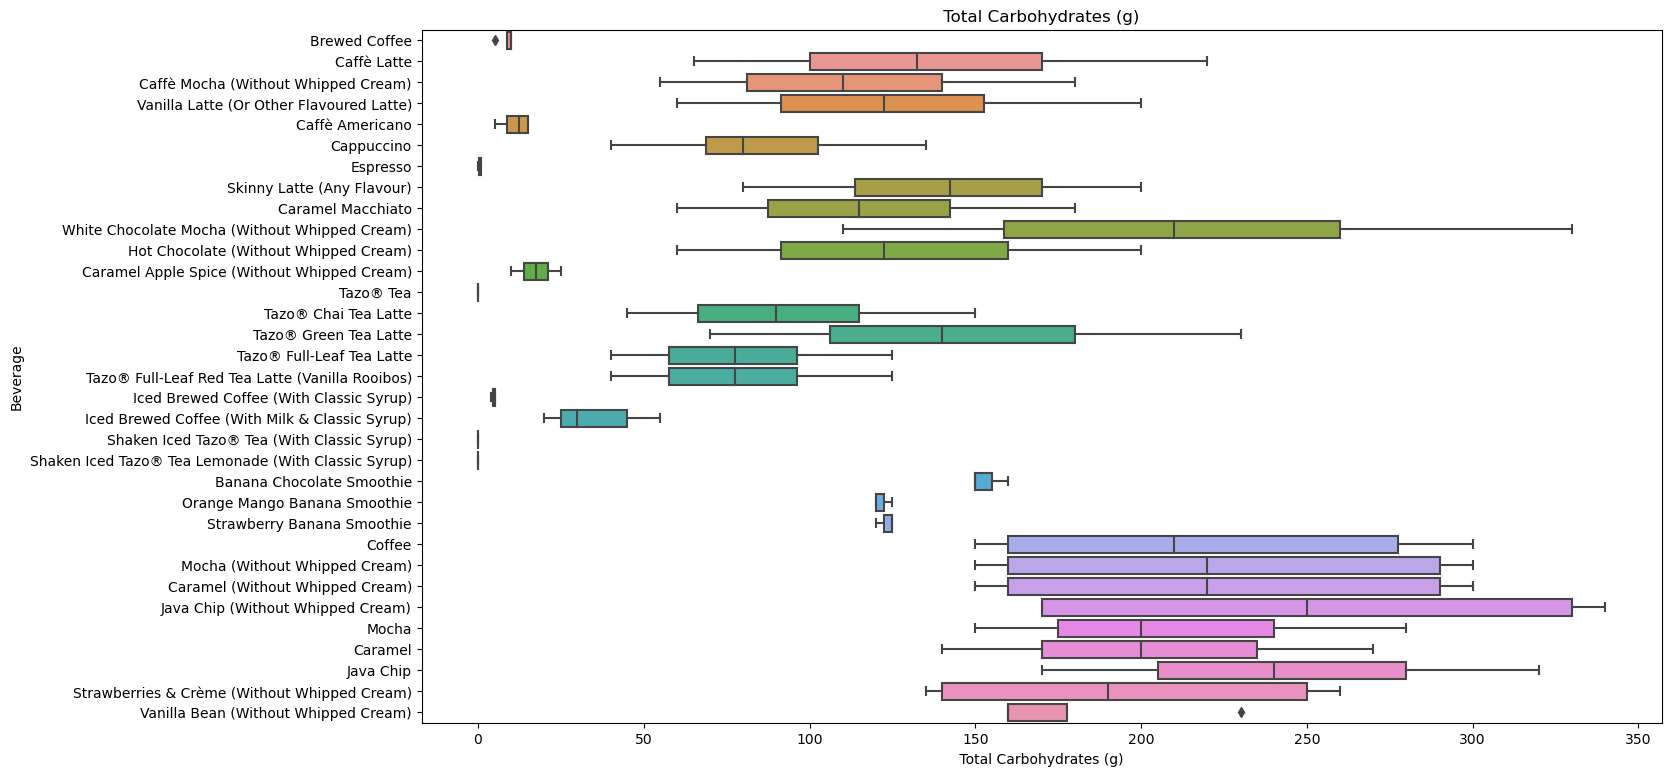

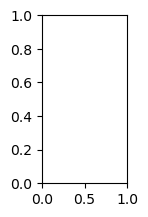

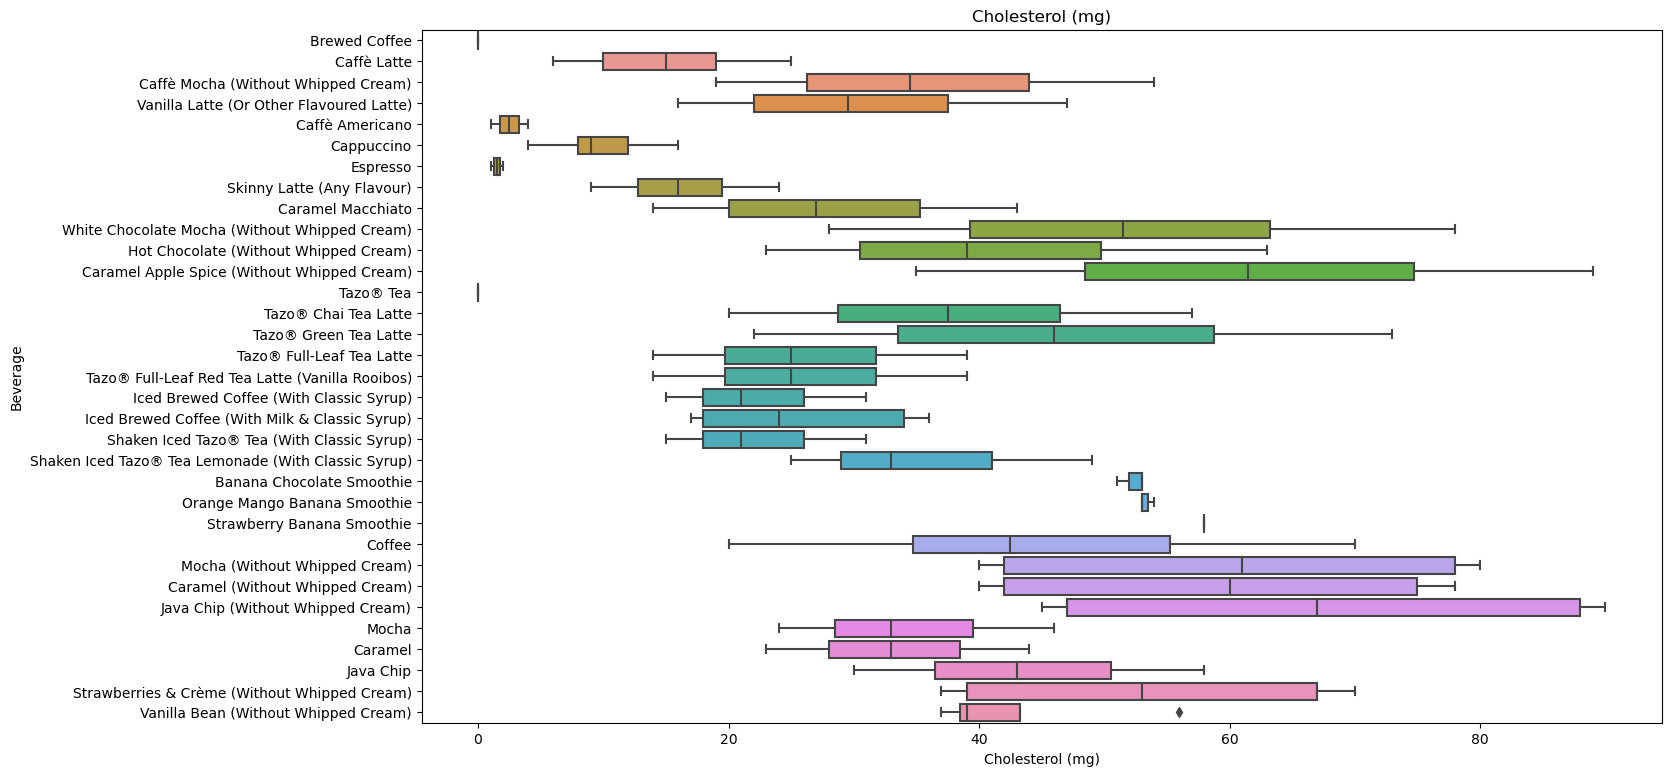

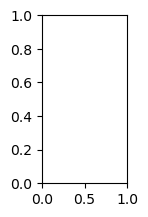

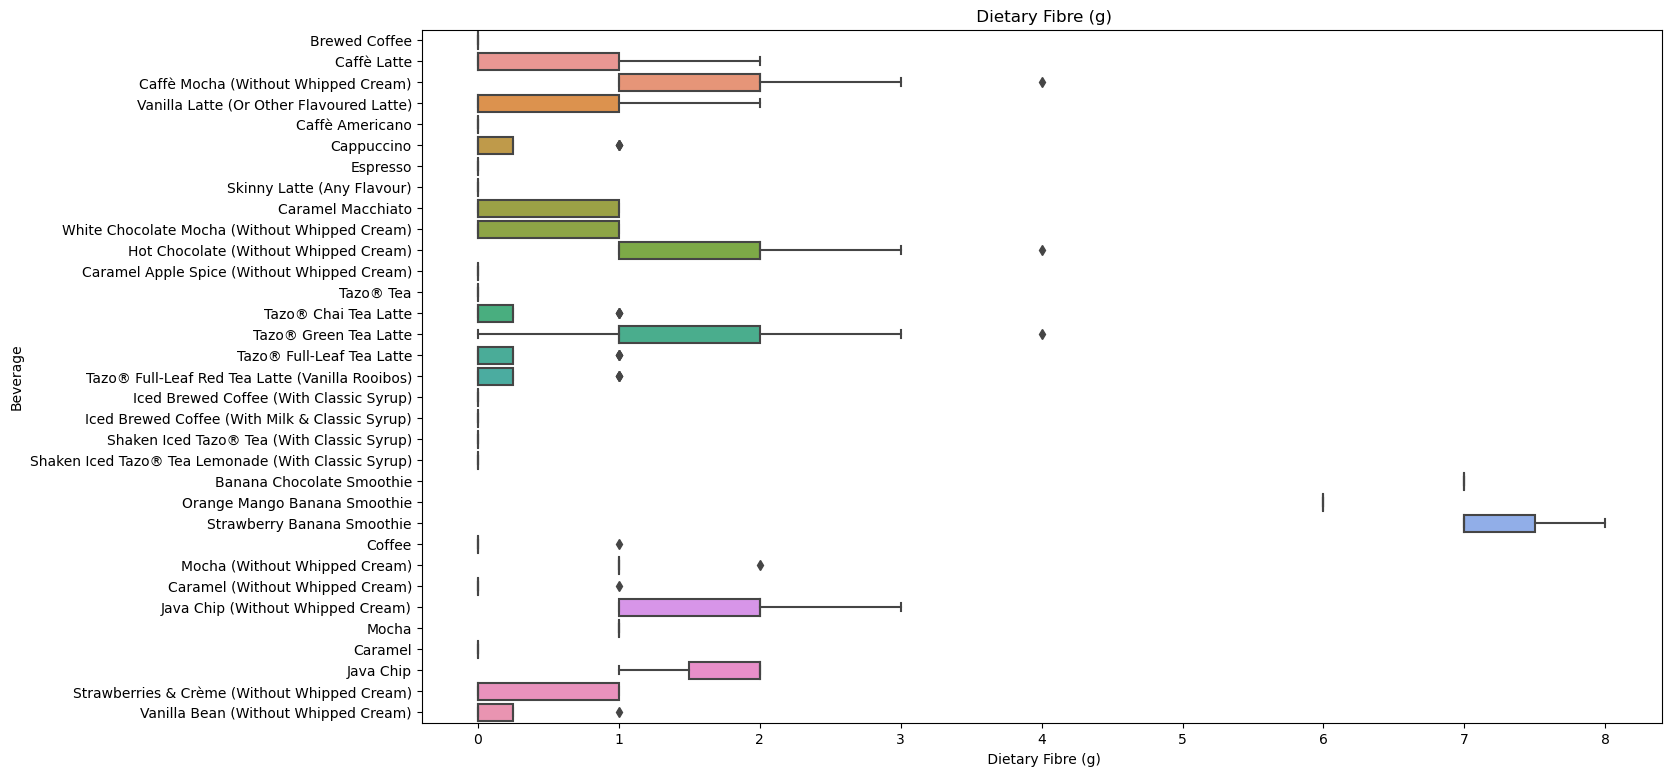

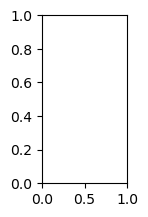

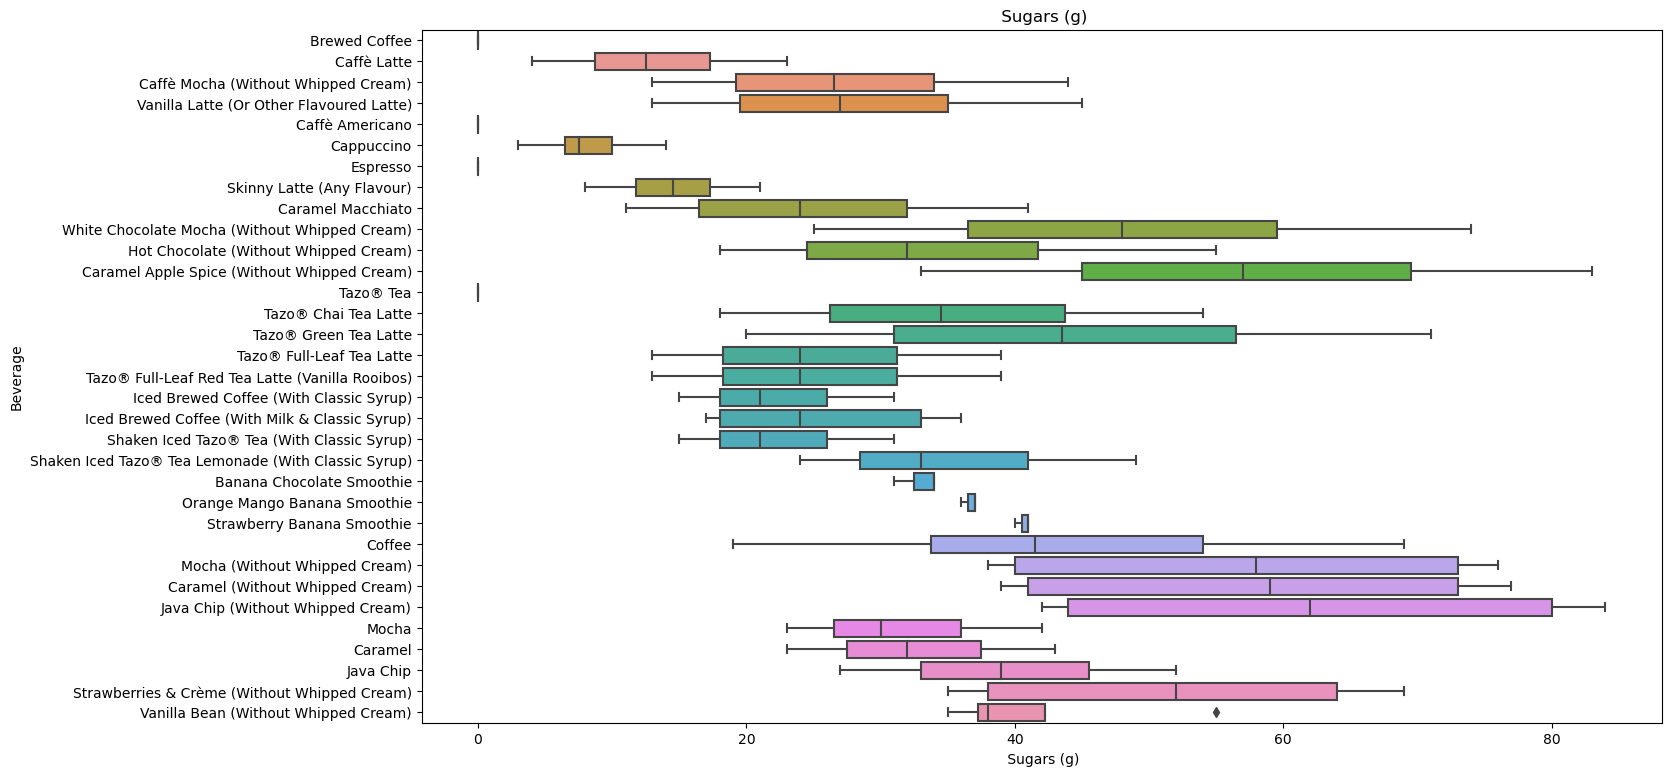

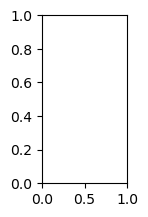

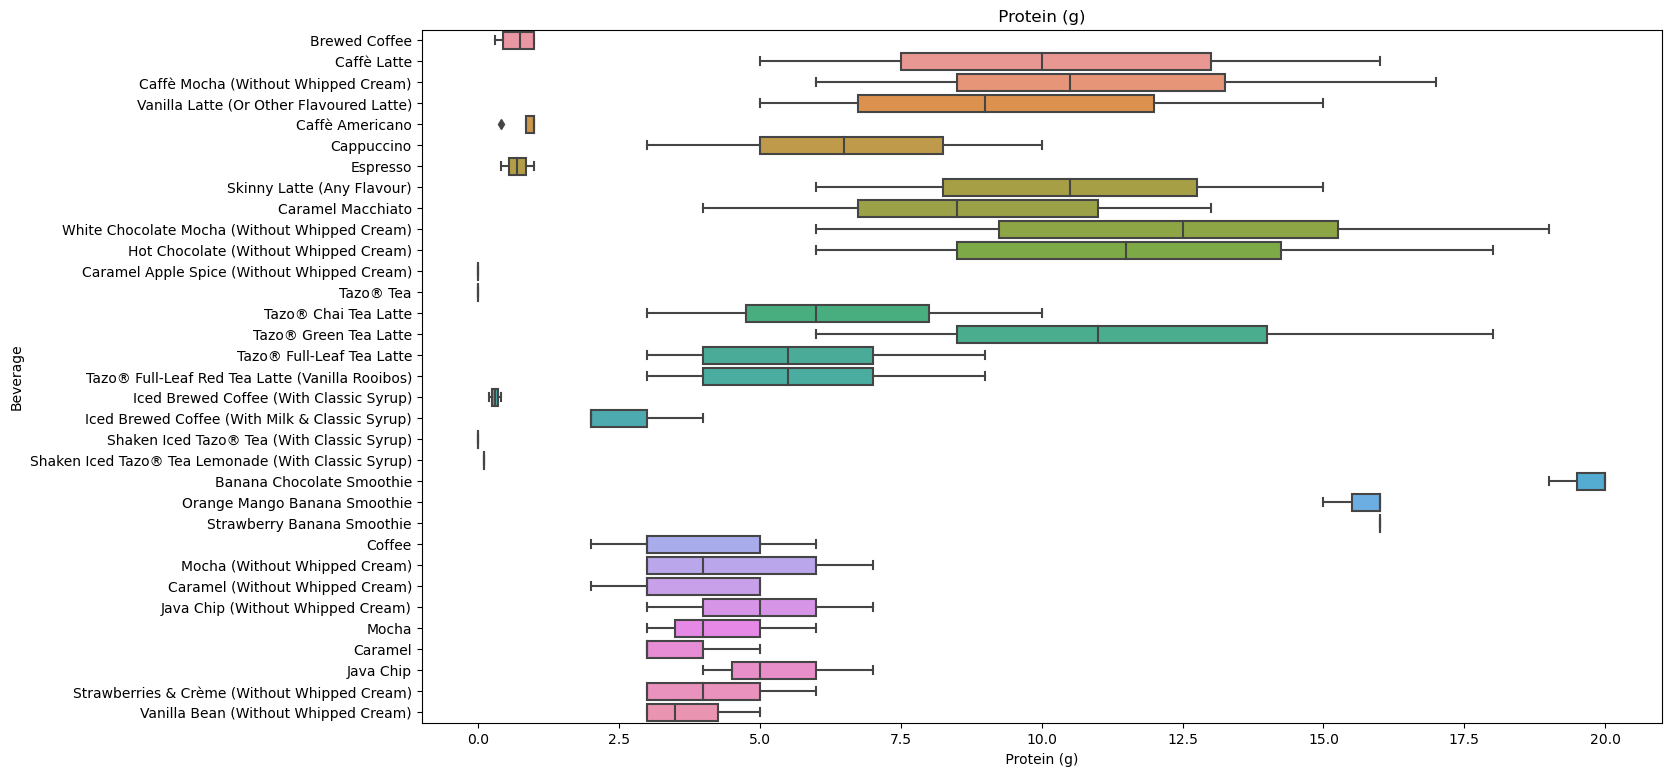

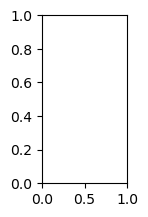

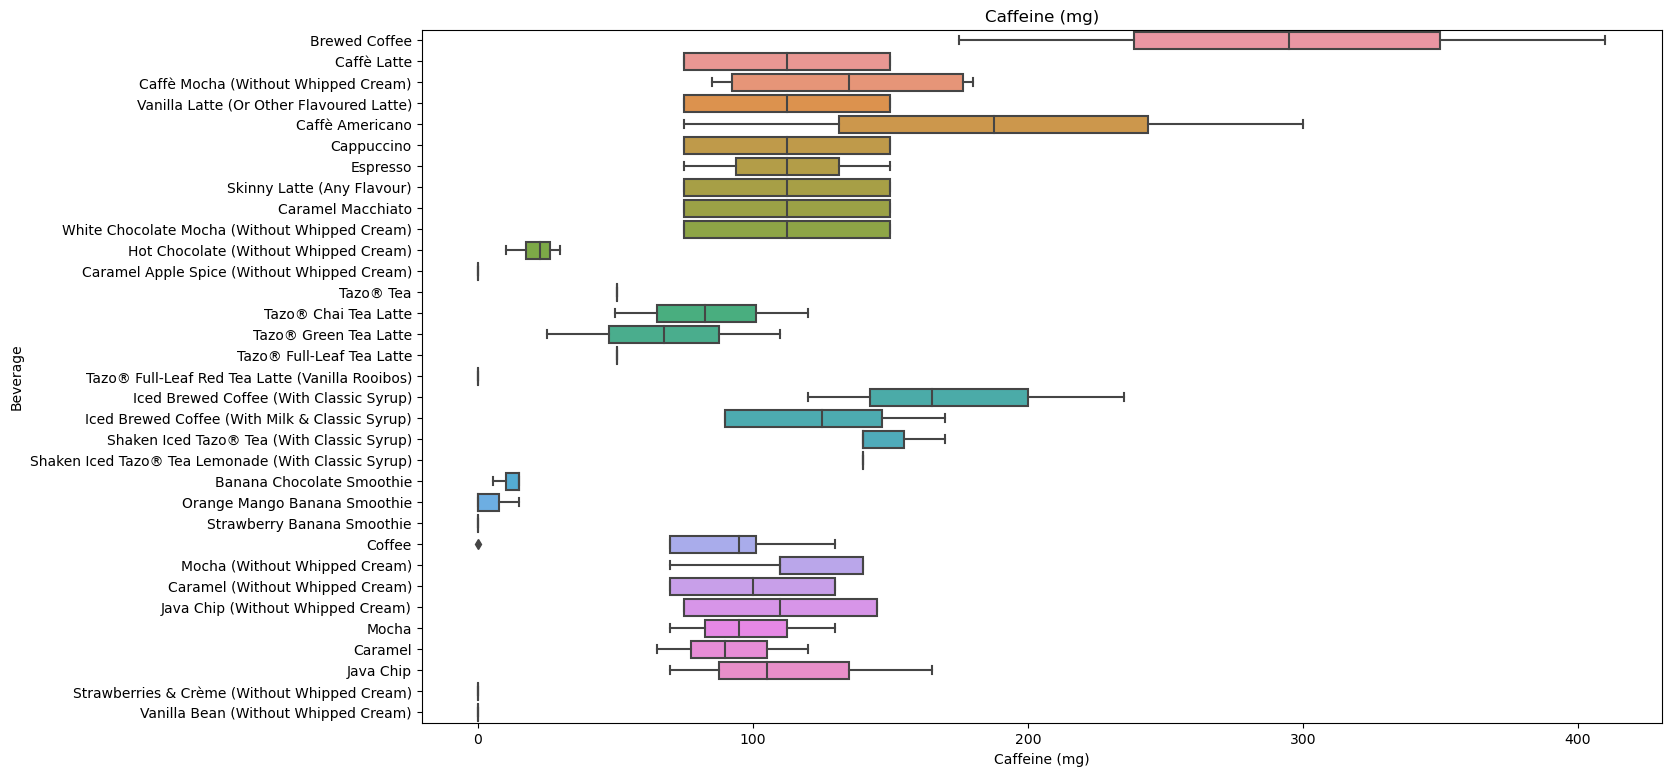

In [89]:
x=1
for cols in numeric_col:
    plt.subplot(2,5,x)
    plt.figure(figsize=(16,9))
    plt.title(cols)
    sns.boxplot(data=data,x=data[cols],y=data['Beverage'])
    plt.show()
    x=x+1
    

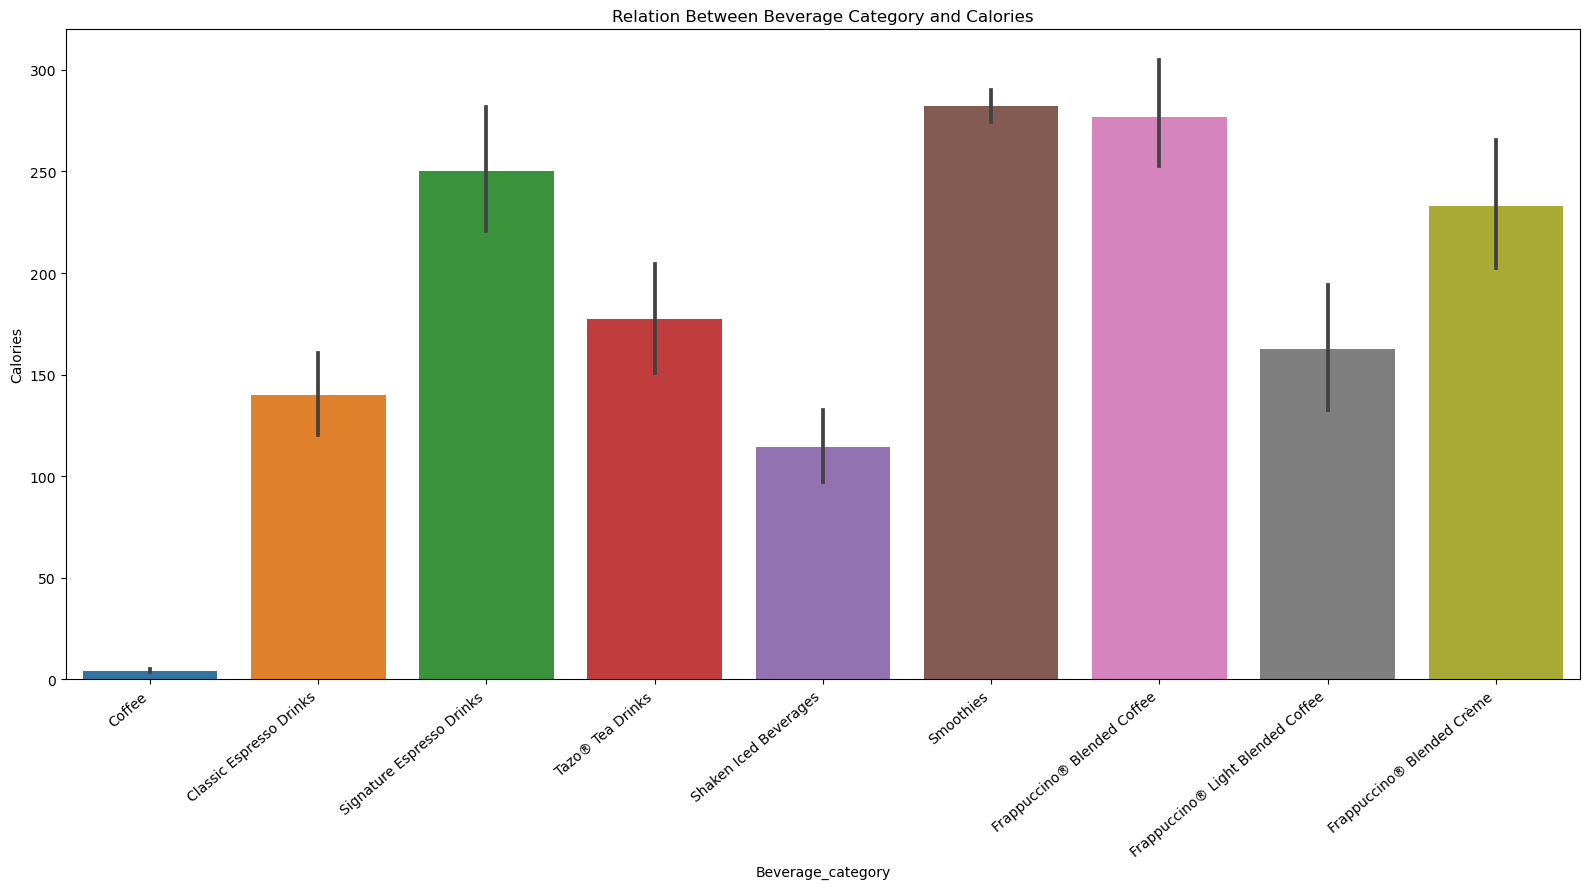

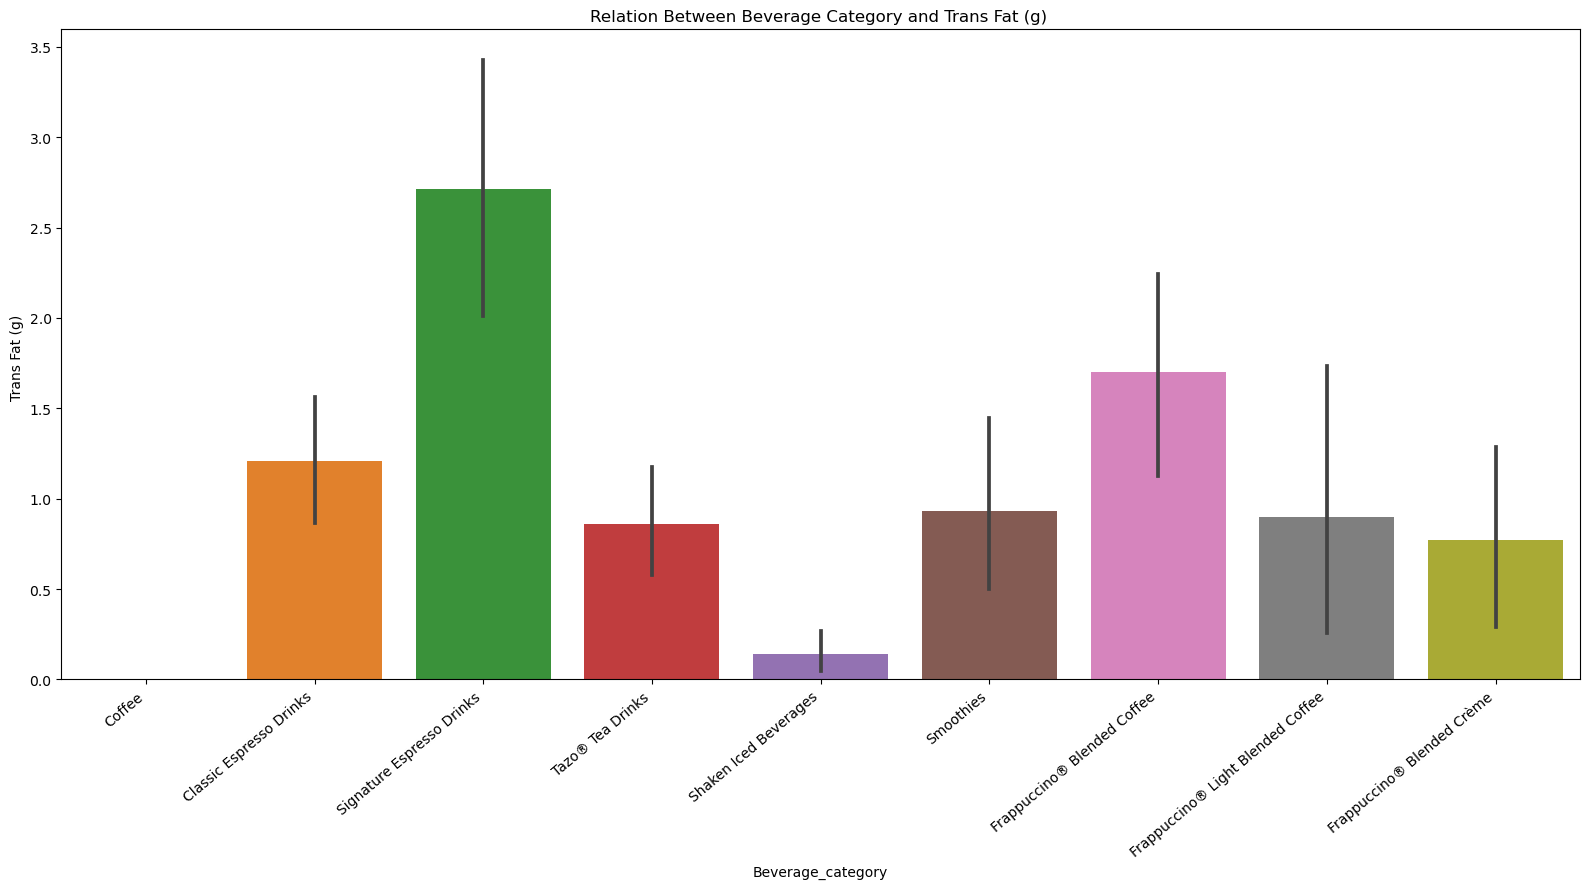

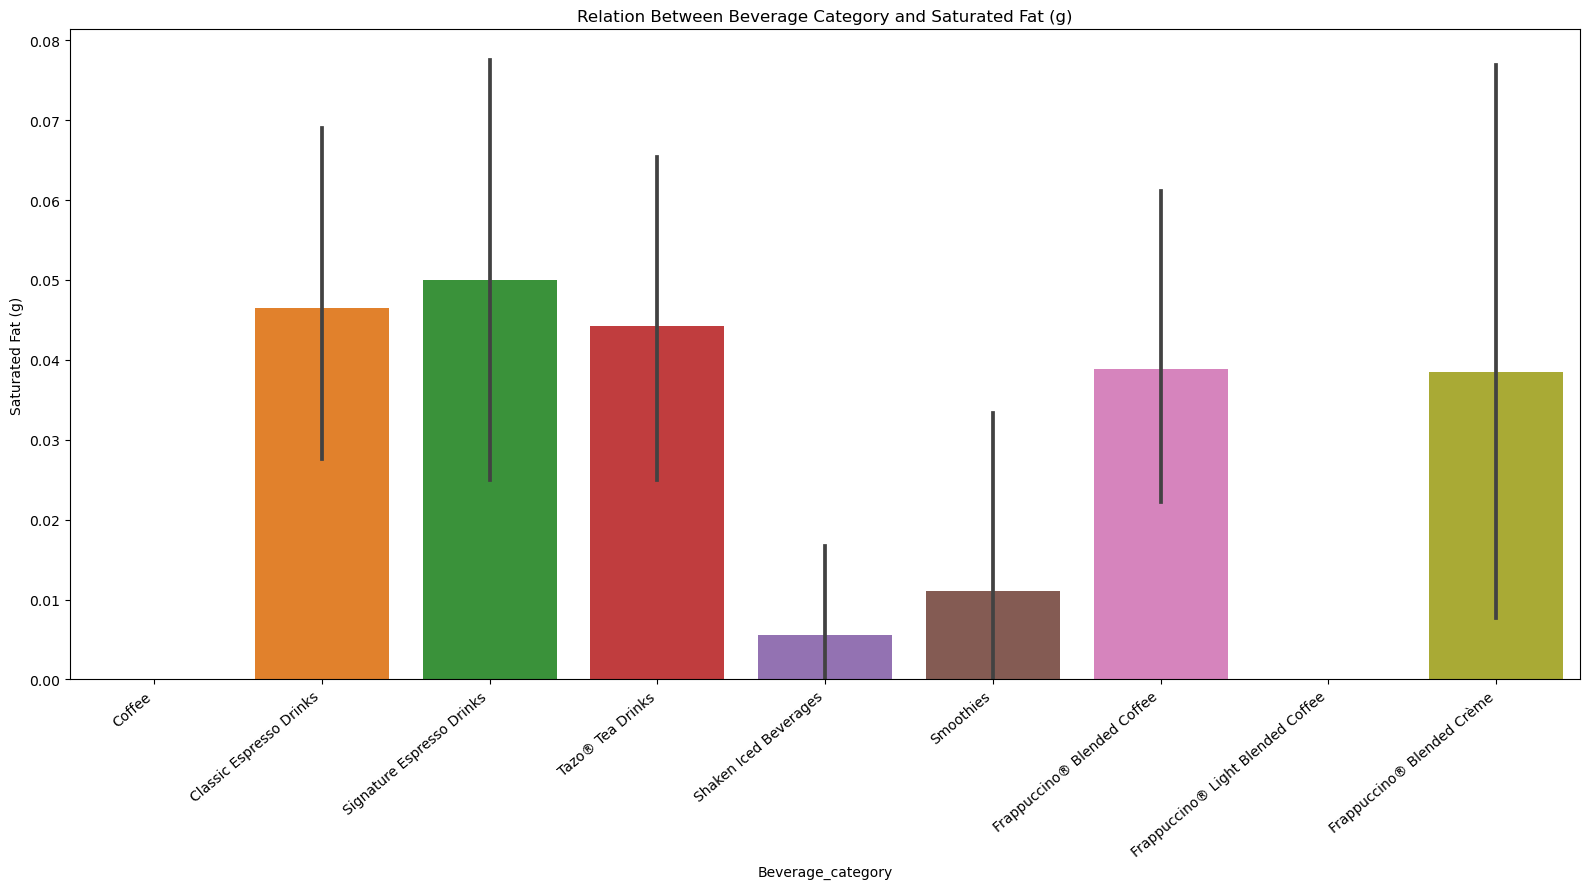

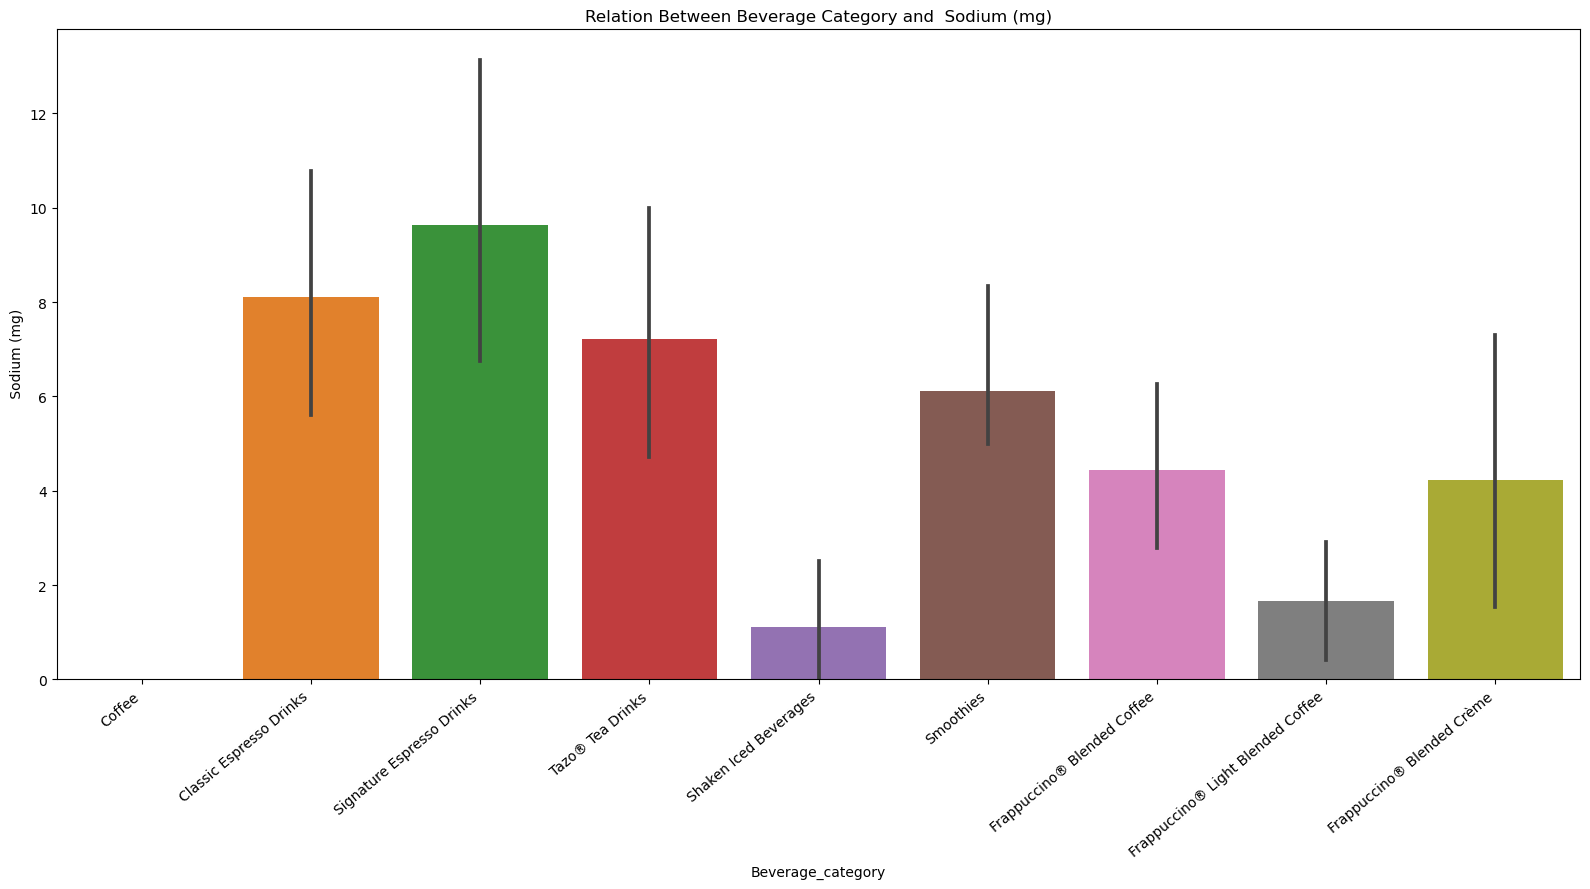

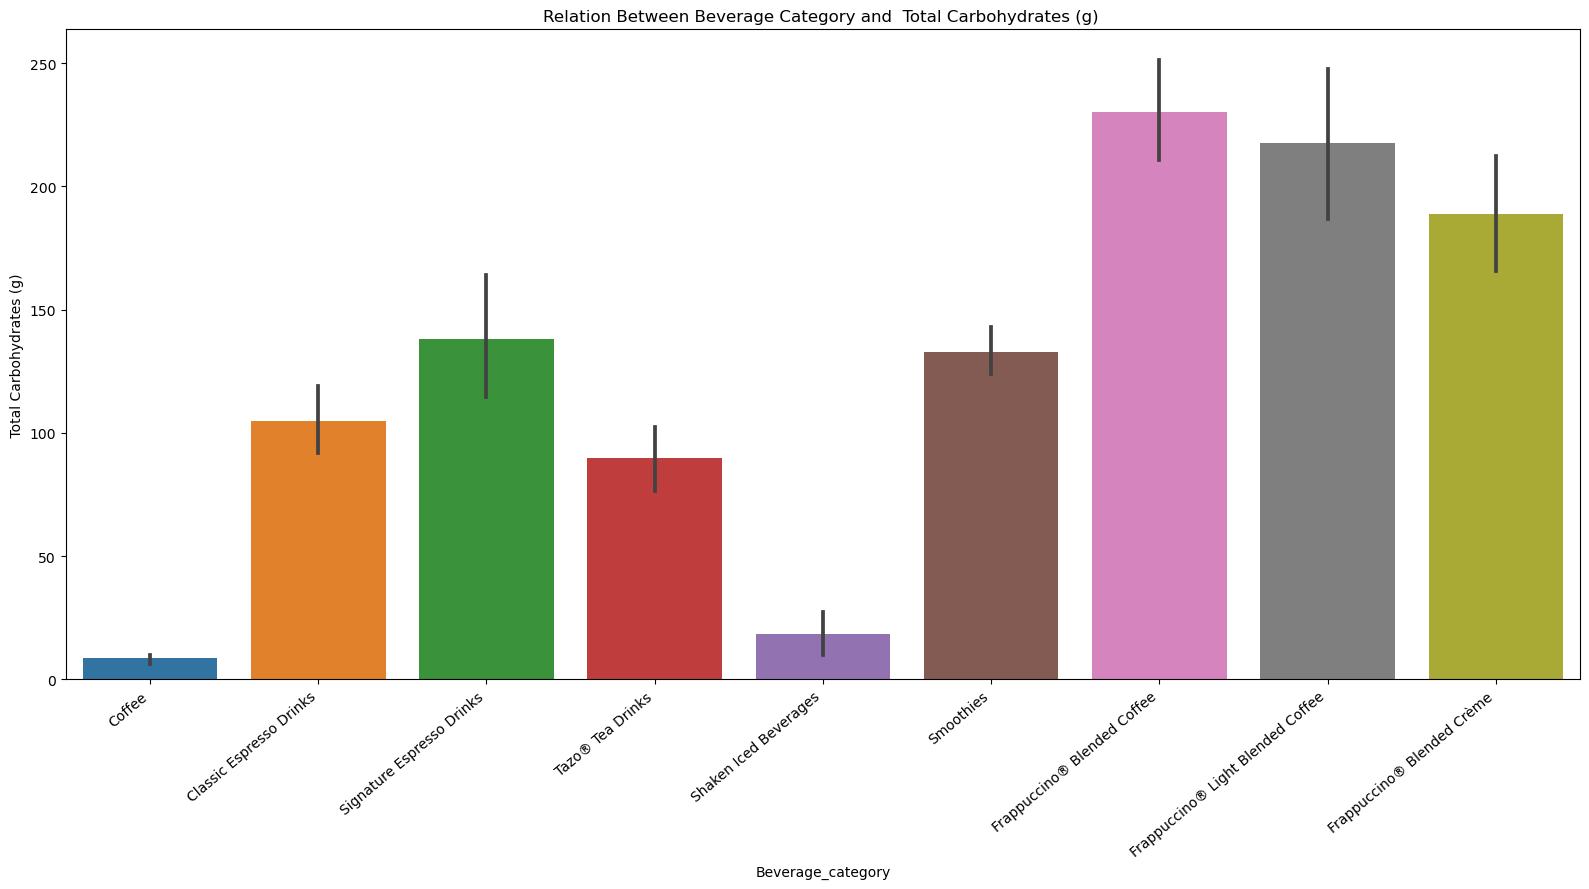

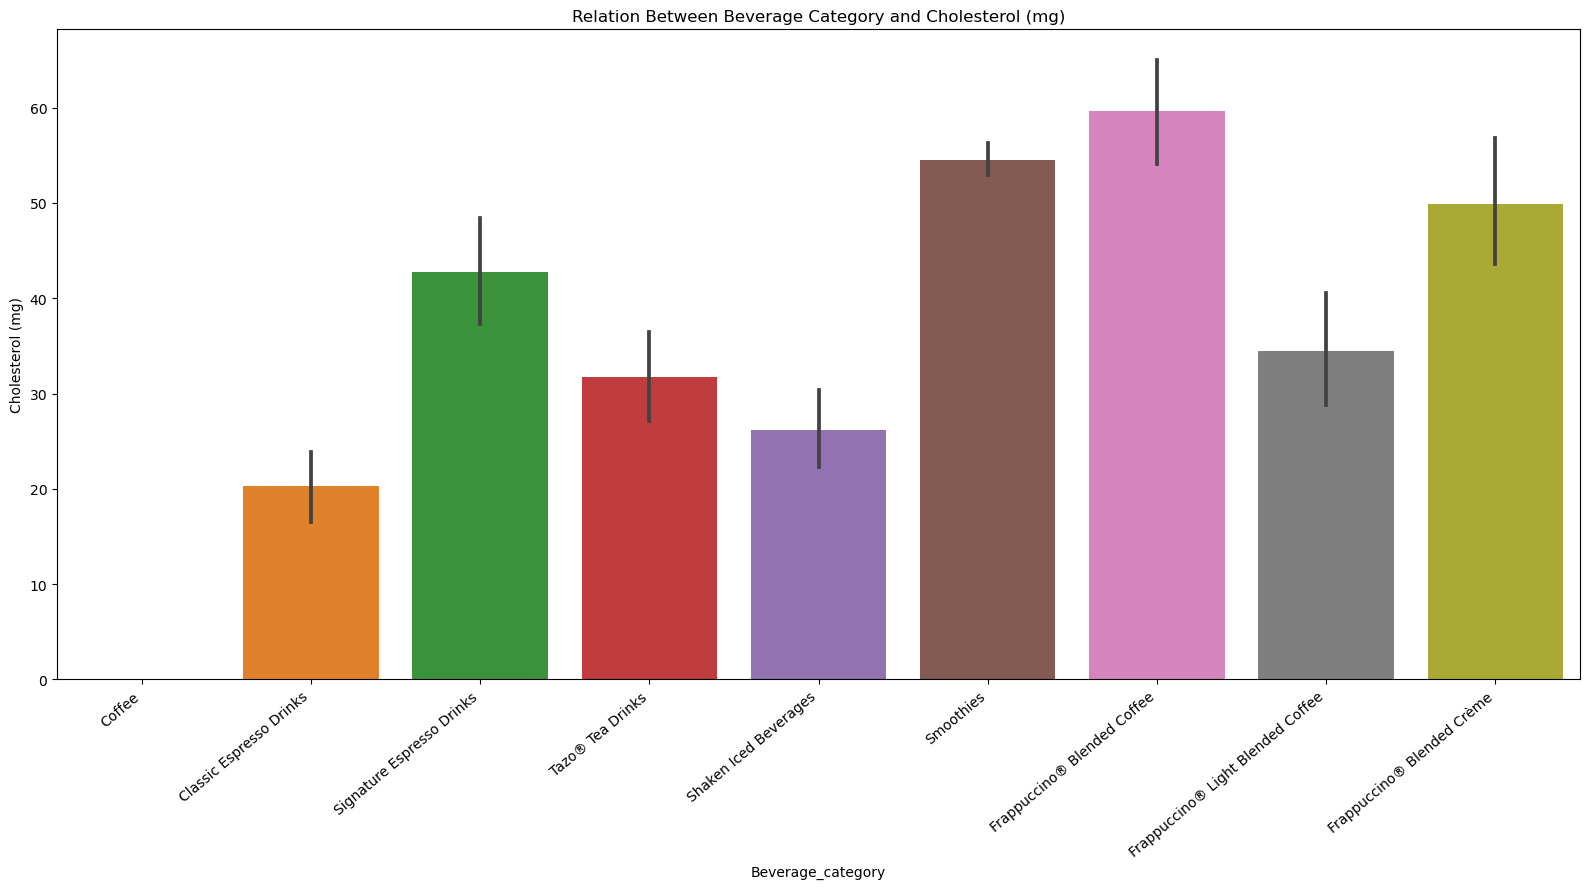

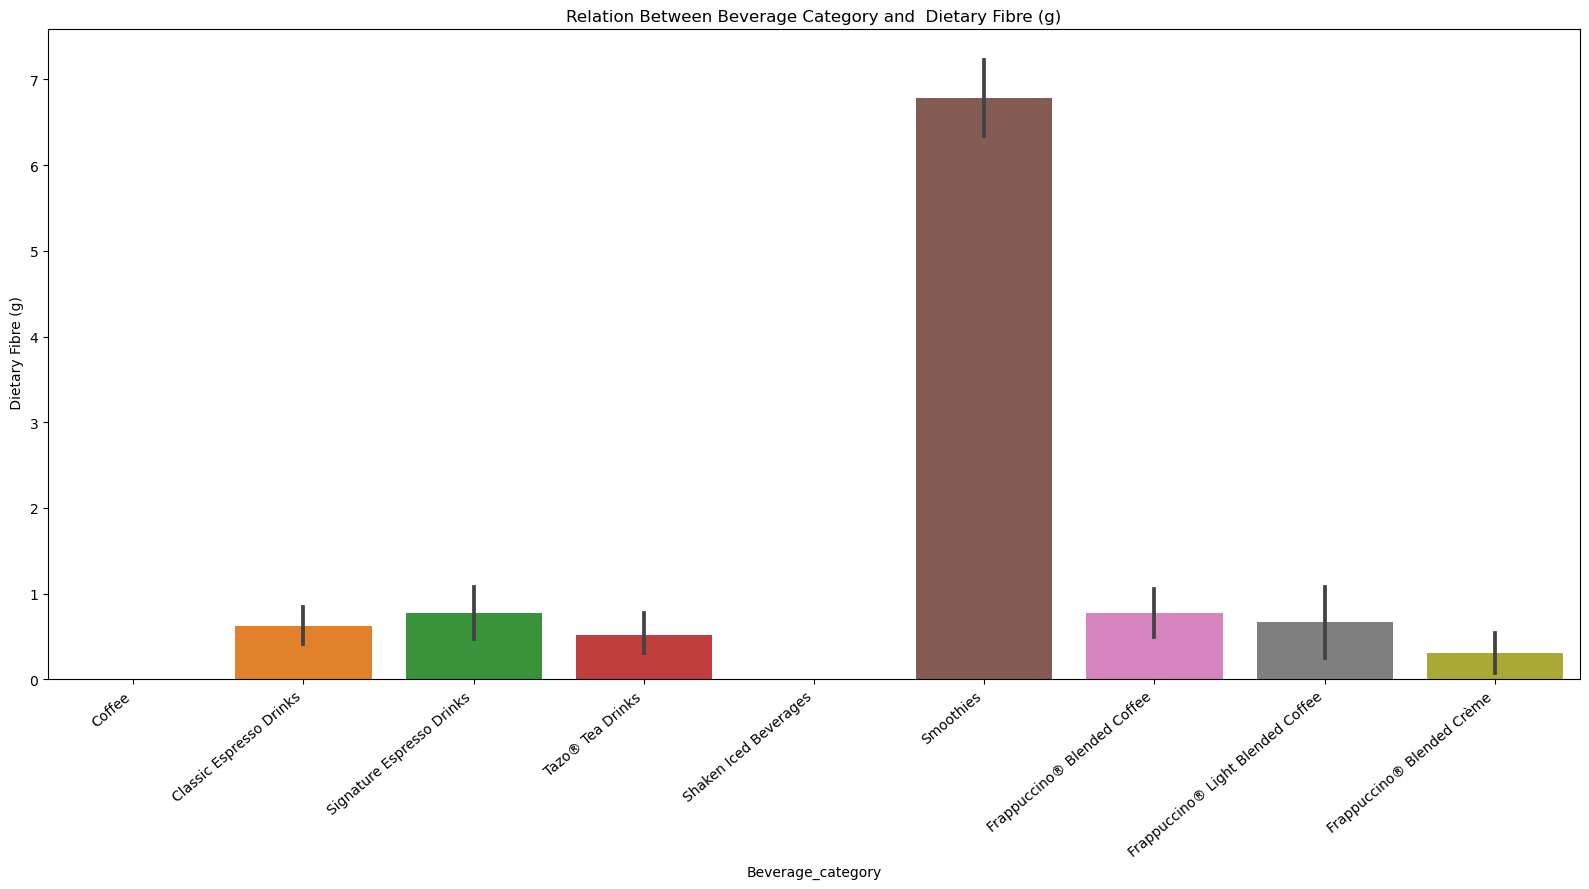

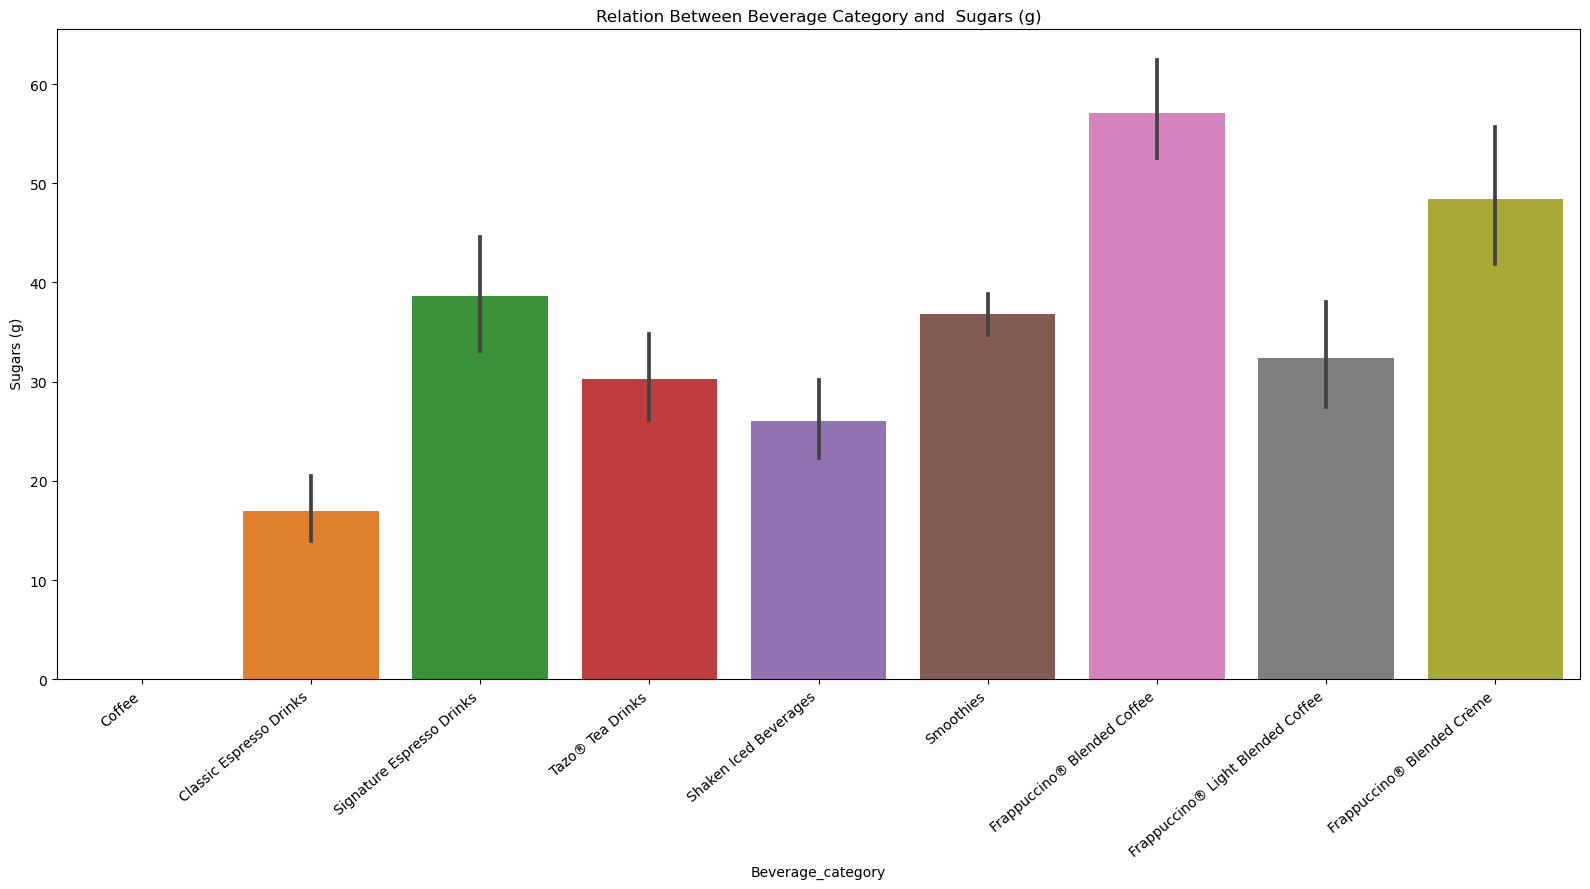

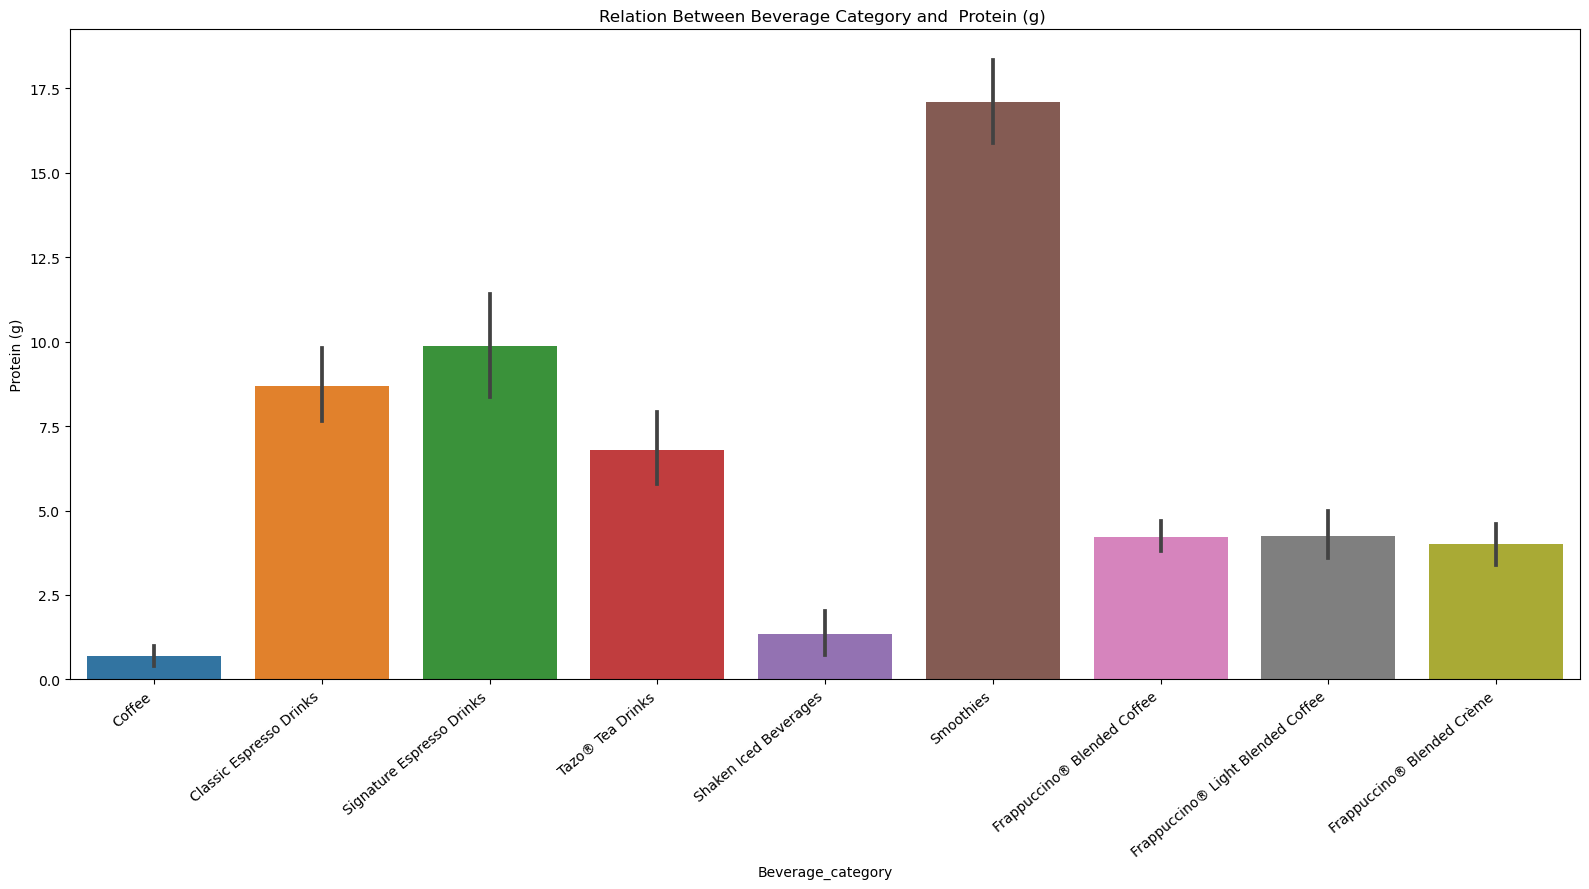

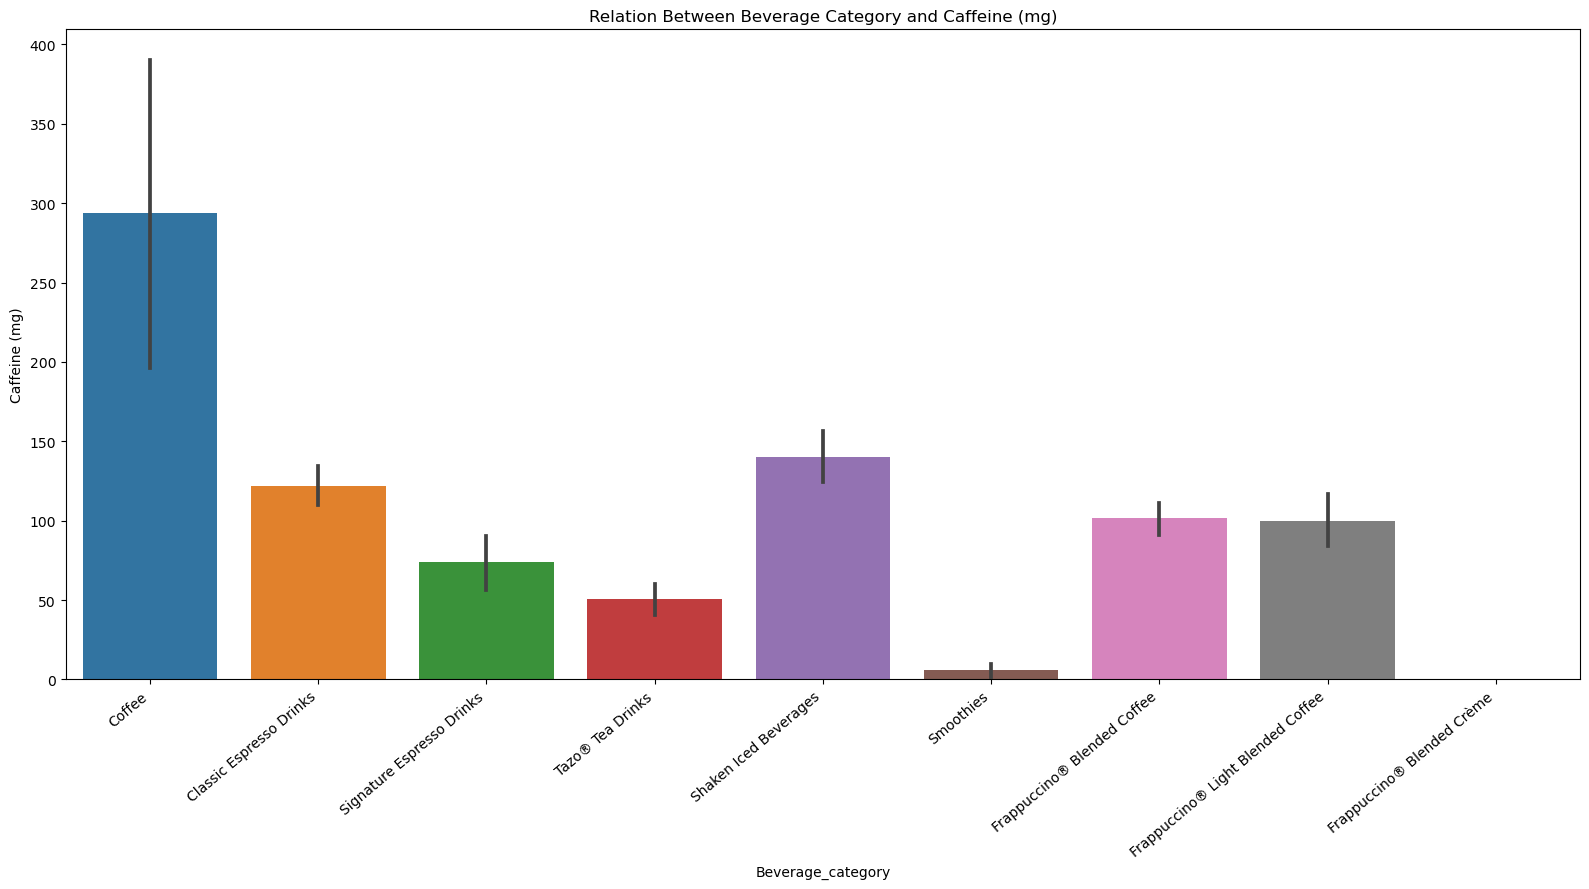

In [90]:
for cols in numeric_col:
    plt.figure(figsize=(16,9))
    plt.title("Relation Between Beverage Category and {}".format(cols))
    ax=sns.barplot(data=data,x=data['Beverage_category'],y=data[cols])
    ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
    plt.tight_layout()
    plt.show()

In [91]:
categorical_cols=data.select_dtypes(include=['object']).columns
categorical_cols

Index(['Beverage_category', 'Beverage', 'Beverage_prep', ' Total Fat (g)',
       'Vitamin A (% DV) ', 'Vitamin C (% DV)', ' Calcium (% DV) ',
       'Iron (% DV) '],
      dtype='object')

In [92]:
for i in categorical_cols:
    print(i)
    print(data[i].value_counts())
    print()

Beverage_category
Classic Espresso Drinks              58
Tazo® Tea Drinks                     52
Signature Espresso Drinks            40
Frappuccino® Blended Coffee          36
Shaken Iced Beverages                18
Frappuccino® Blended Crème           13
Frappuccino® Light Blended Coffee    12
Smoothies                             9
Coffee                                4
Name: Beverage_category, dtype: int64

Beverage
Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)        12
White Chocolate Mocha (Without Whipped Cream)          12
Tazo® Full-Leaf Tea Latte                              12
Tazo® Green Tea Latte                                  12
Tazo® Chai Tea Latte                                   12
Coffee                                                 12
Hot Chocolate (Without Whipped Cream)                  12
Caramel Macchiato                                      12
Cappuccino                                             12
Vanilla Latte (Or Other Flavoured Latte)            

In [93]:
cat_cols=[' Total Fat (g)','Vitamin A (% DV) ', 'Vitamin C (% DV)', ' Calcium (% DV) ','Iron (% DV) ']